In [289]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
pd.set_option("display.max.columns", None)
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D,axes3d
import warnings
import re
warnings.filterwarnings('ignore')

# Traffic Analysis

In [290]:
df = pd.read_csv('/Users/haitonghuang/Downloads/visits_2020-01-01_2022-08-24.csv')


#df.set_index('day')

df.head()



,referrer_source,referrer_name,location_city,ua_browser_version,ua_browser,ua_form_factor,ua_os_version,ua_os,page_path,page_resource_id,page_type,page_url,location_region,location_country,utm_campaign_source,utm_campaign_name,hour,day,year,month,utm_campaign_content,utm_campaign_medium,total_visitors,total_sessions,avg_duration,total_bounce_rate,total_carts,total_checkouts,total_conversion,total_orders_placed,total_pageviews
0,Direct,NaN,Ashburn,94,Chrome,Desktop,NaN,Linux,/404,NaN,NaN,https://shop.livingspace.com/404,Virginia,United States,NaN,NaN,2022-07-11 04:00:00,2022-07-11,2022,2022-07,NaN,NaN,64,64,0s,1.0,0,0,0.0,0,64
1,Direct,NaN,Ashburn,94,Chrome,Desktop,NaN,Linux,/404,NaN,NaN,https://shop.livingspace.com/404,Virginia,United States,NaN,NaN,2022-07-18 03:00:00,2022-07-18,2022,2022-07,NaN,NaN,60,60,0s,1.0,0,0,0.0,0,60
2,Direct,NaN,Ashburn,94,Chrome,Desktop,NaN,Linux,/404,NaN,NaN,https://shop.livingspace.com/404,Virginia,United States,NaN,NaN,2022-08-21 21:00:00,2022-08-21,2022,2022-08,NaN,NaN,60,60,0s,1.0,0,0,0.0,0,60
3,Direct,NaN,Ashburn,94,Chrome,Desktop,NaN,Linux,/404,NaN,NaN,https://shop.livingspace.com/404,Virginia,United States,NaN,NaN,2022-08-07 21:00:00,2022-08-07,2022,2022-08,NaN,NaN,57,57,0s,1.0,0,0,0.0,0,57
4,Direct,NaN,Ashburn,94,Chrome,Desktop,NaN,Linux,/404,NaN,NaN,https://shop.livingspace.com/404,Virginia,United States,NaN,NaN,2022-07-31 21:00:00,2022-07-31,2022,2022-07,NaN,NaN,56,56,0s,1.0,0,0,0.0,0,56


In [291]:
df['referrer_name'] = np.where((df['utm_campaign_name']=='sag_organic') & (df['utm_campaign_source']=='google'), 'Google_Organic' , df['referrer_name'])
df['referrer_source'] = np.where((df['utm_campaign_name']=='sag_organic') & (df['utm_campaign_source']=='google'), 'Search' , df['referrer_source'])

In [292]:
df['referrer_name'].value_counts()

Facebook             93078
Google               37077
Google_Organic       26540
Instagram             7329
Youtube               1555
DuckDuckGo             460
Bing                   416
Yahoo!                 212
Gmail                  146
Pinterest               83
Yandex                  63
Livingspace             39
Ecosia                  36
Google Images           19
Yellowpages             13
Messenger                7
AOL                      4
Baidu                    4
Naver                    4
Pocket                   3
Doubleclick              2
Linktr                   2
LinkedIn                 2
InfoSpace                2
Android                  1
Dailyhive                1
Outlook.com              1
Force                    1
Googlesyndication        1
Layerdesigned            1
Info                     1
Name: referrer_name, dtype: int64

In [293]:
df['referrer_source'].value_counts()

Direct     112445
Social     102057
Search      64848
Unknown     17390
Email         147
Name: referrer_source, dtype: int64

In [294]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(296887, 31)
Index(['referrer_source', 'referrer_name', 'location_city',
       'ua_browser_version', 'ua_browser', 'ua_form_factor', 'ua_os_version',
       'ua_os', 'page_path', 'page_resource_id', 'page_type', 'page_url',
       'location_region', 'location_country', 'utm_campaign_source',
       'utm_campaign_name', 'hour', 'day', 'year', 'month',
       'utm_campaign_content', 'utm_campaign_medium', 'total_visitors',
       'total_sessions', 'avg_duration', 'total_bounce_rate', 'total_carts',
       'total_checkouts', 'total_conversion', 'total_orders_placed',
       'total_pageviews'],
      dtype='object')
referrer_source          object
referrer_name            object
location_city            object
ua_browser_version       object
ua_browser               object
ua_form_factor           object
ua_os_version            object
ua_os                    object
page_path                object
page_resource_id        float64
page_type                object
page_url                 ob

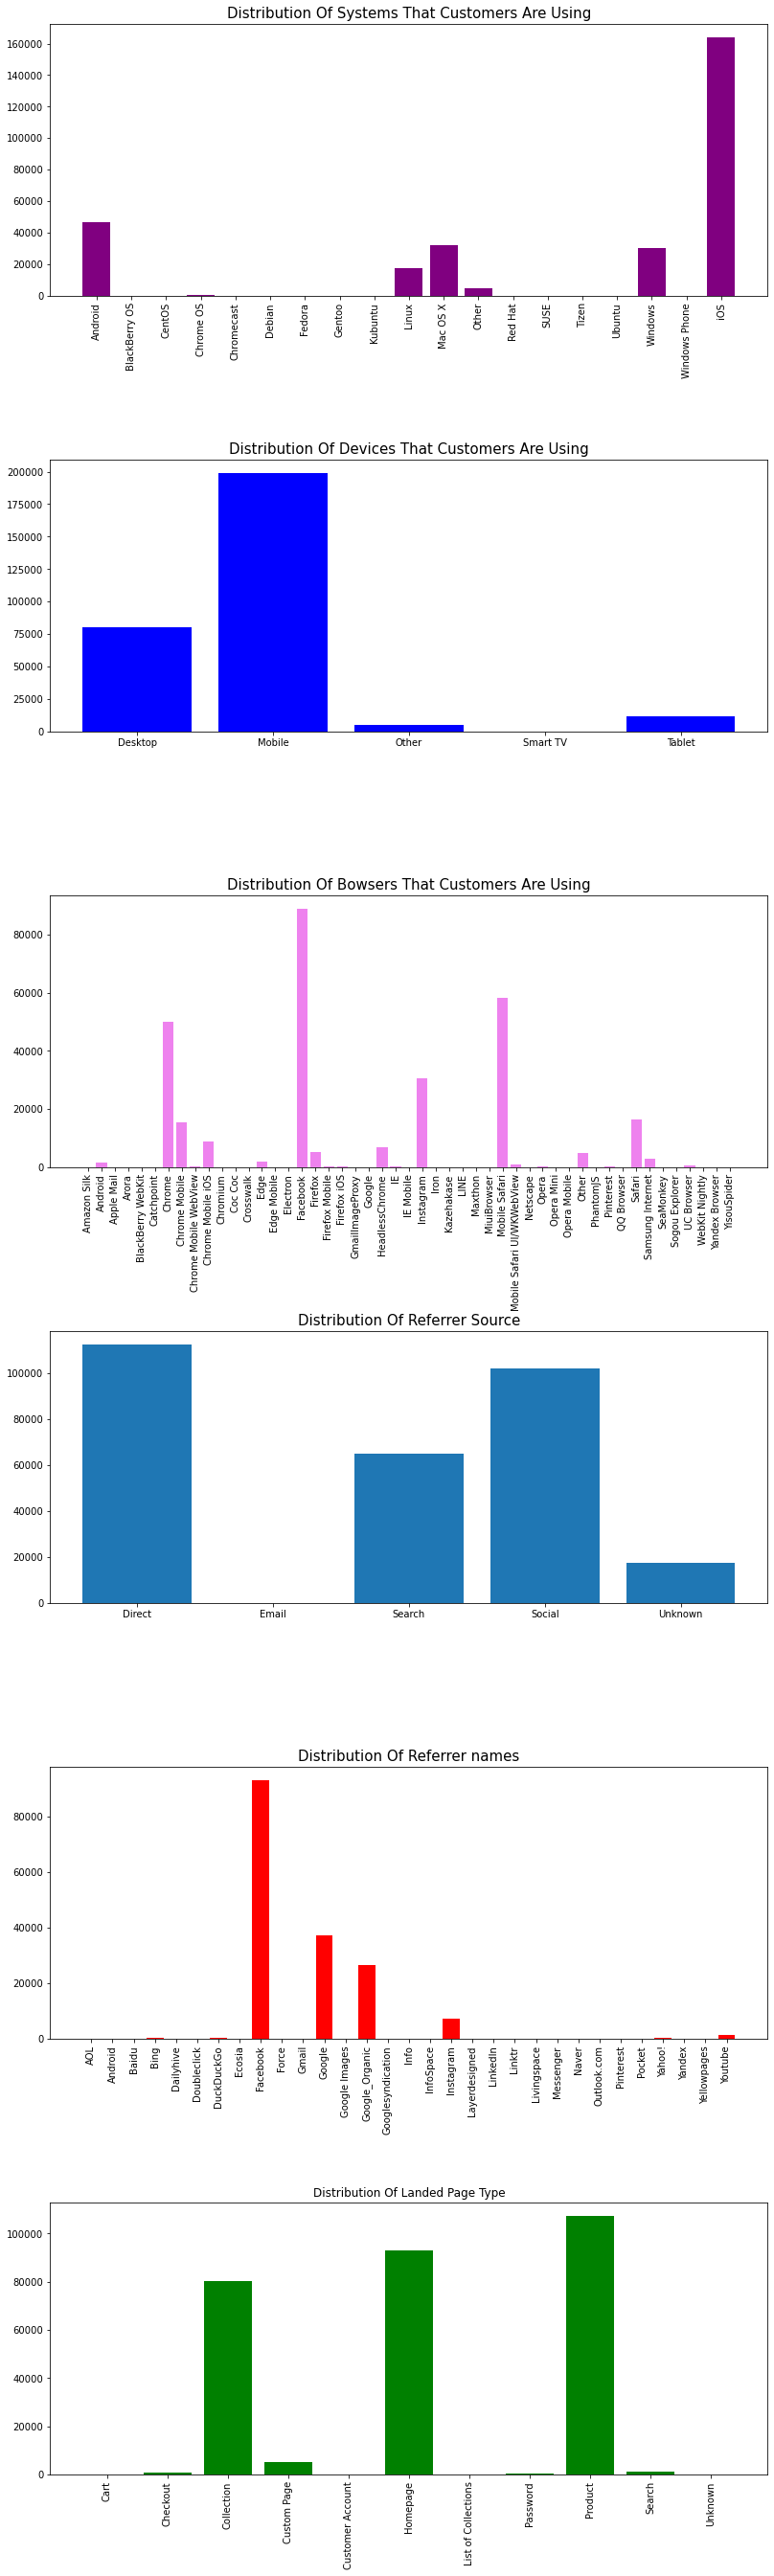

In [295]:
system = df.groupby('ua_os')['ua_os'].count()
device = df.groupby('ua_form_factor')['ua_form_factor'].count()
browser = df.groupby('ua_browser')['ua_browser'].count()
source = df.groupby('referrer_source')['referrer_source'].count()
referrer = df.groupby('referrer_name')['referrer_name'].count()
page_type = df.groupby('page_type')['page_type'].count()

fig,ax = plt.subplots(6,1,figsize = (15,40))
fig.tight_layout(pad=15.0)

ax[0].bar(system.index, system,color='purple')
ax[0].set_title('Distribution Of Systems That Customers Are Using',fontsize = 15)
ax[0].set_xticklabels(system.index, rotation = 90)

ax[1].bar(device.index,device,color='blue')
ax[1].set_title('Distribution Of Devices That Customers Are Using',fontsize = 15)

ax[2].bar(browser.index,browser,color='violet')
ax[2].set_title('Distribution Of Bowsers That Customers Are Using',fontsize = 15)
ax[2].set_xticklabels(browser.index,rotation = 90)

ax[3].bar(source.index, source)
ax[3].set_title('Distribution Of Referrer Source',fontsize = 15)

ax[4].bar(referrer.index,referrer,color='red')
ax[4].set_title('Distribution Of Referrer names',fontsize=15)
ax[4].set_xticklabels(referrer.index, rotation=90)

ax[5].bar(page_type.index, page_type, color = 'green')
ax[5].set_title('Distribution Of Landed Page Type')
ax[5].set_xticklabels(page_type.index, rotation=90)

plt.show()



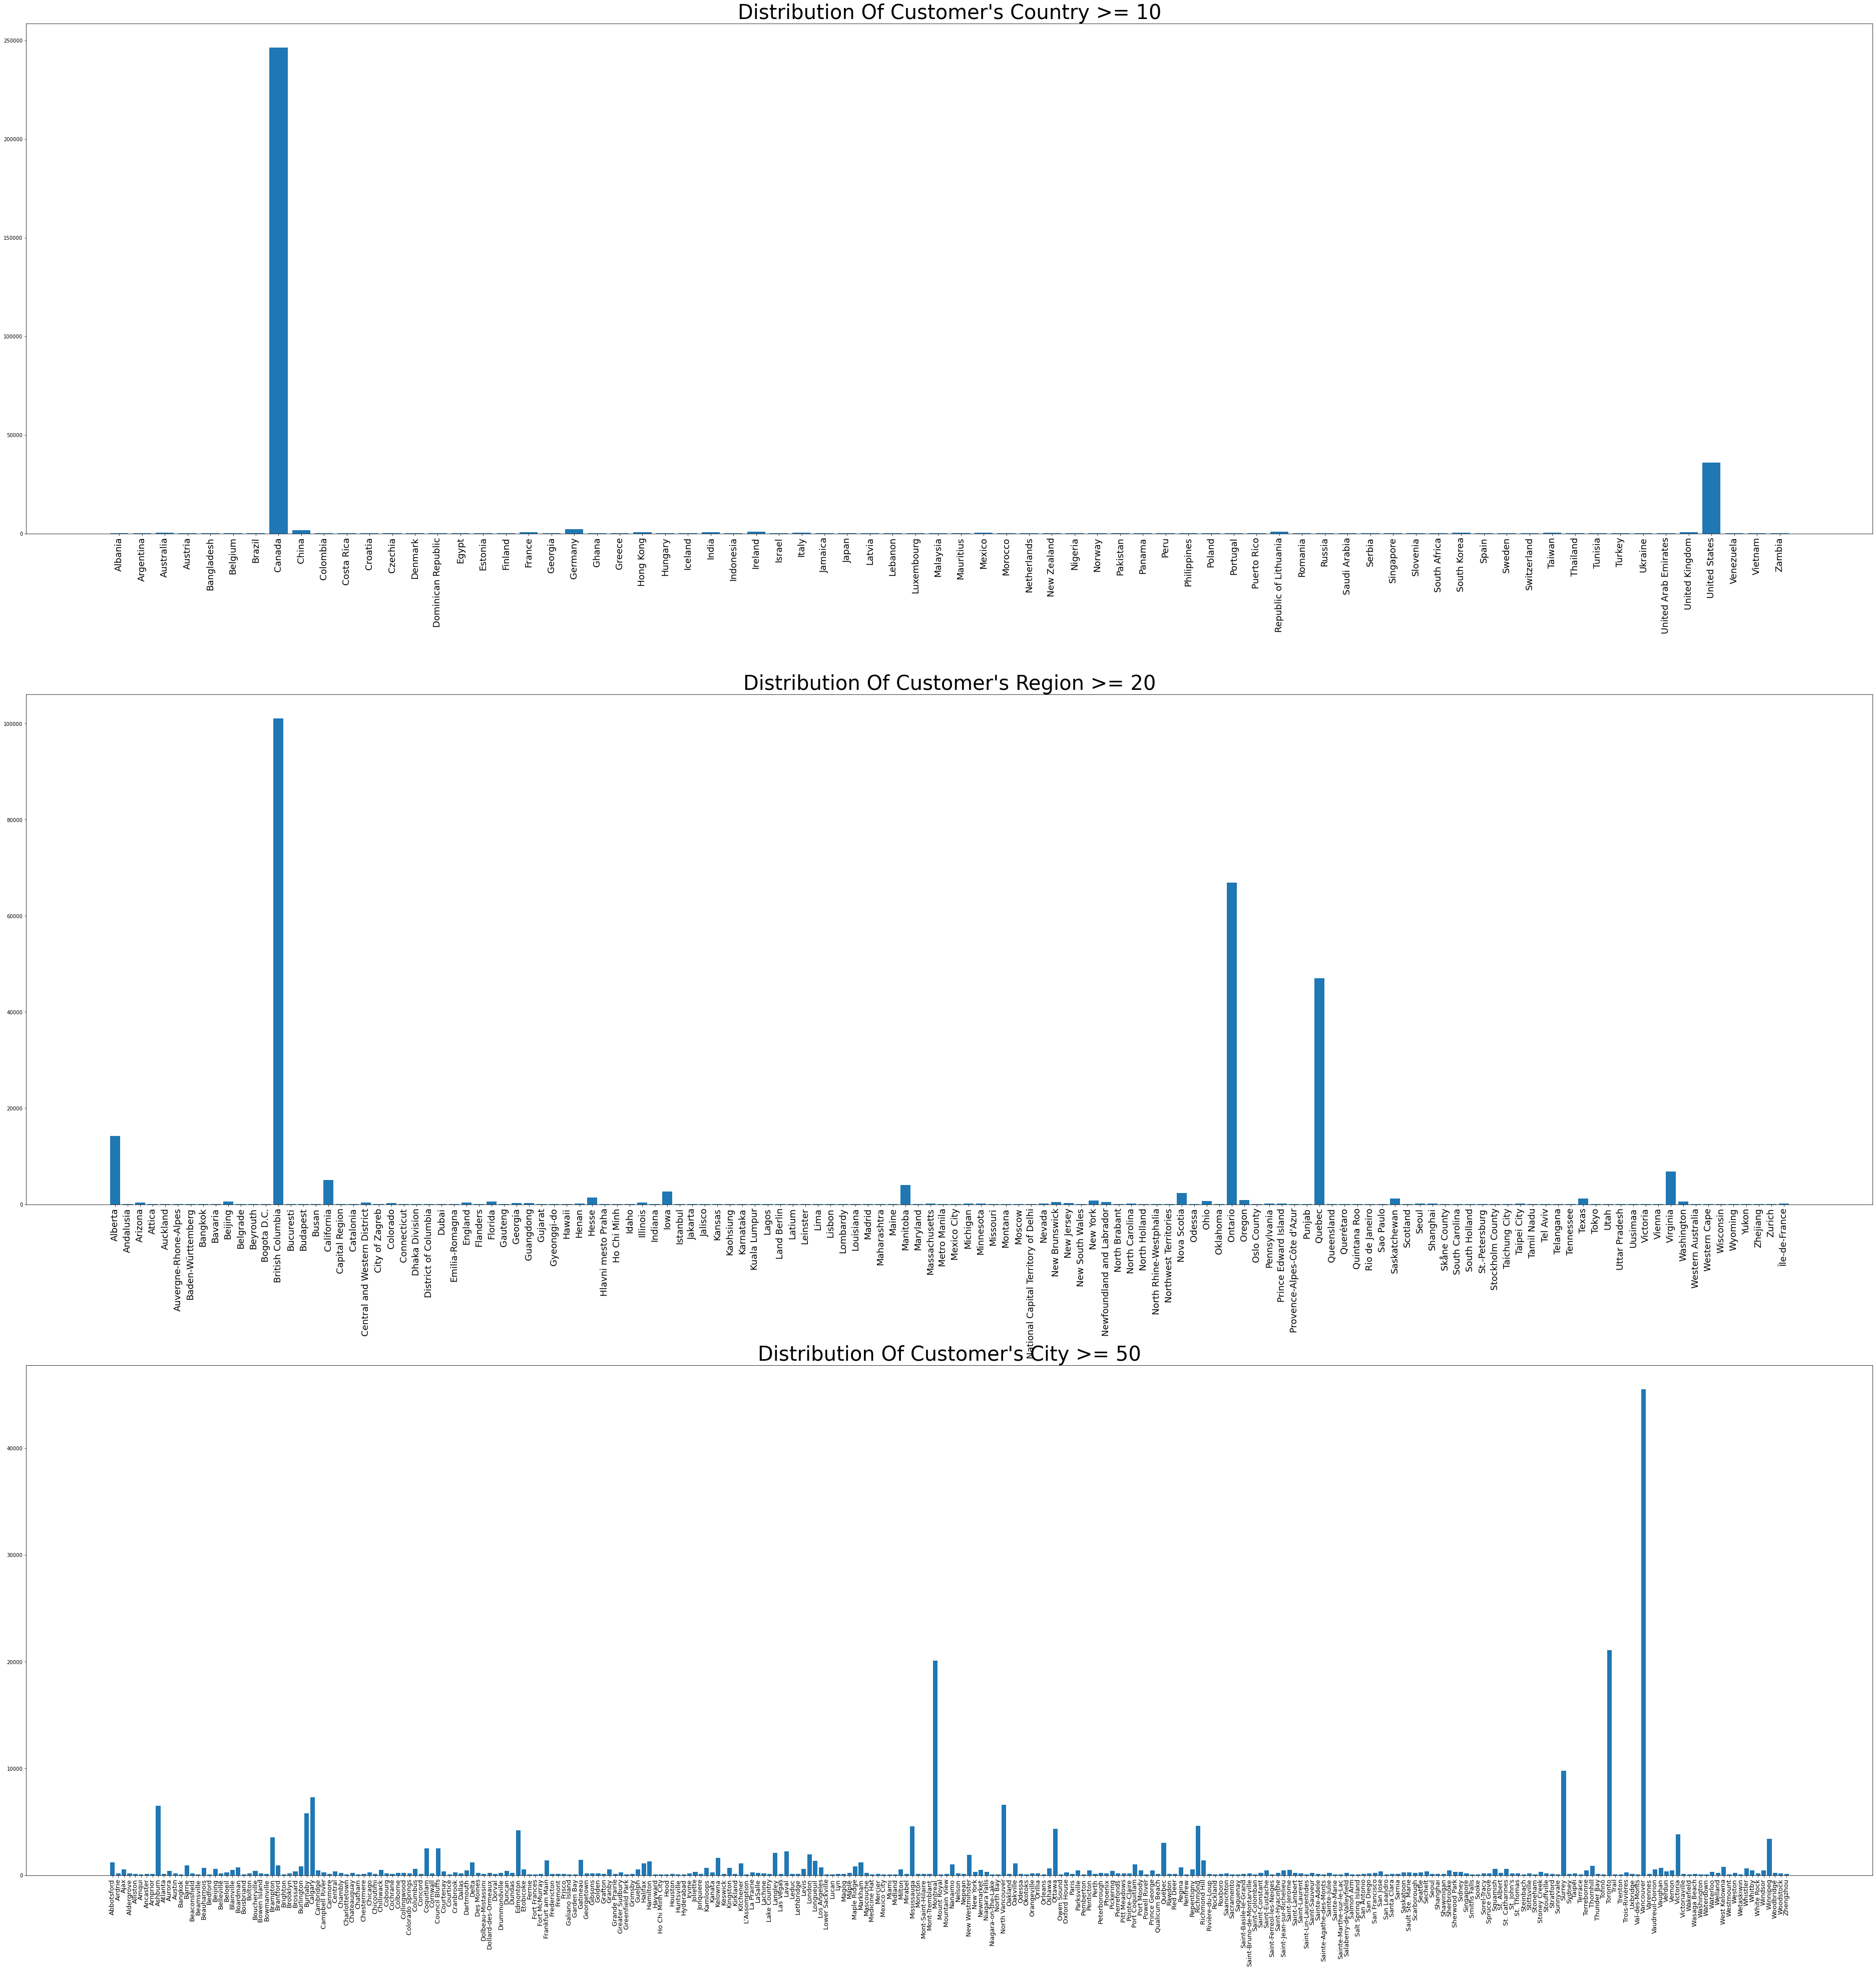

In [296]:
country = pd.DataFrame(df.groupby('location_country')['location_country'].count().reset_index(name="count"))
country = country[country['count']>= 15]
region = pd.DataFrame(df.groupby('location_region')['location_region'].count().reset_index(name="count"))
region = region[region['count']>= 20]
city = pd.DataFrame(df.groupby('location_city')['location_city'].count().reset_index(name = 'count'))
city = city[city['count'] >= 60]

fig, ax = plt.subplots(3,1,figsize = (60,60))
fig.tight_layout(pad=30.0)


ax[0].bar(country['location_country'] , country['count'])
ax[0].set_title("Distribution Of Customer's Country >= 10",fontsize = 40)
ax[0].set_xticklabels(country['location_country'] , rotation=90,fontsize = 18)


ax[1].bar(region['location_region'] , region['count'])
ax[1].set_title("Distribution Of Customer's Region >= 20",fontsize = 40)
ax[1].set_xticklabels(region['location_region'] , rotation=90,fontsize = 18)


ax[2].bar(city['location_city'], city['count'])
ax[2].set_title("Distribution Of Customer's City >= 50",fontsize = 40)
ax[2].set_xticklabels(city['location_city'] , rotation=90,fontsize = 13)

plt.show()

### All traffic in US

In [297]:
direct_city_purchased_all_us = df.loc[df['location_country'] == 'United States']
direct_city_purchased_all_us = pd.DataFrame(direct_city_purchased_all_us['location_region'].value_counts())
direct_city_purchased_all_us.head(20)

,location_region
Virginia,6862
California,5050
Iowa,2711
Texas,1239
Oregon,875
New York,765
Ohio,695
Washington,611
Florida,542
Illinois,389


### All traffic out of US and from Search

In [298]:
search_city_purchased_all = df.loc[(df['referrer_source'] == 'Search') & (df['location_country'] != 'United States')]
search_city_purchased_all = pd.DataFrame(search_city_purchased_all['location_region'].value_counts())
search_city_purchased_all.head(20)

,location_region
British Columbia,26874
Ontario,15625
Quebec,7781
Alberta,1900
Manitoba,464
Nova Scotia,405
Saskatchewan,232
New Brunswick,202
England,187
Newfoundland and Labrador,176


### All traffic out of US and from Social

In [299]:
social_city_purchased_all = df.loc[(df['referrer_source'] == 'Social') & (df['location_country'] != 'United States')]

social_city_purchased_all = pd.DataFrame(social_city_purchased_all['location_region'].value_counts())
social_city_purchased_all.head(20)

,location_region
Ontario,32072
Quebec,29237
British Columbia,20978
Alberta,8278
Manitoba,2438
Nova Scotia,1347
Saskatchewan,578
New Brunswick,118
Newfoundland and Labrador,81
England,35


### All traffic out of US and from Direct

In [300]:
direct_city_purchased_all = df.loc[(df['referrer_source'] == 'Direct') & (df['location_country'] != 'United States')]

direct_city_purchased_all = pd.DataFrame(direct_city_purchased_all['location_region'].value_counts())
direct_city_purchased_all.head(20)

,location_region
British Columbia,45396
Ontario,15959
Quebec,8698
Alberta,3428
Hesse,1371
Manitoba,958
Nova Scotia,493
Saskatchewan,262
Central and Western District,166
Newfoundland and Labrador,158


### All traffic out of US and from Unknown

In [301]:
unknown_city_purchased_all = df.loc[(df['referrer_source'] == 'Unknown') & (df['location_country'] != 'United States')]

unknown_city_purchased_all = pd.DataFrame(unknown_city_purchased_all['location_region'].value_counts())
unknown_city_purchased_all.head(20)

,location_region
British Columbia,7762
Ontario,3165
Quebec,1260
Alberta,565
Beijing,507
Guangdong,189
Manitoba,117
Shanghai,110
Henan,88
Saskatchewan,79


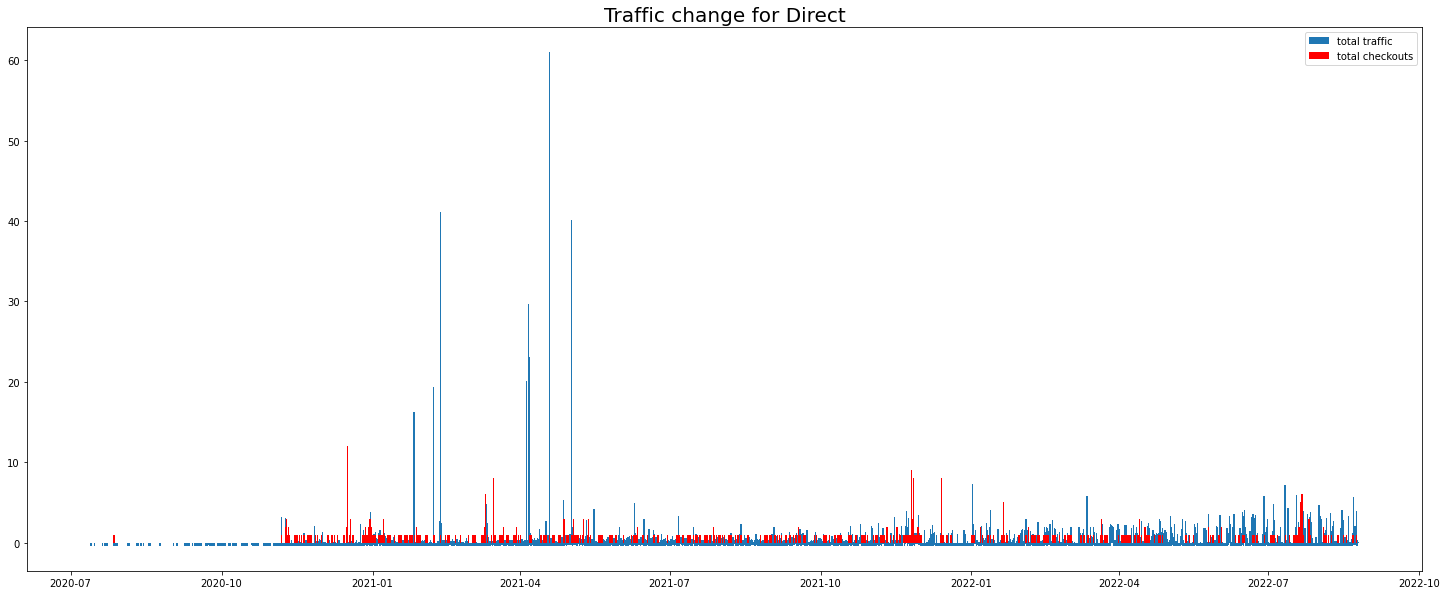

In [302]:
Direct = pd.DataFrame(df[df['referrer_source'] == 'Direct'])
month_direct = Direct.groupby('hour')['total_visitors','total_checkouts','total_orders_placed'].sum()
month_direct = month_direct.reset_index()

month_direct['hour'] = pd.to_datetime(month_direct['hour'])


scaler = StandardScaler()

d = month_direct[['total_visitors']]

totalvistor_scaled = pd.DataFrame(scaler.fit_transform(d))
month_direct = pd.concat([month_direct,totalvistor_scaled],axis=1)
month_direct.columns = ['hour','total_visitors','total_checkouts','total_orders_placed','scaled_total_visitors']

fig,ax = plt.subplots(figsize = (25,10))
ax.bar(month_direct['hour'], month_direct['scaled_total_visitors'],label = 'total traffic')
ax.set_title('Traffic change for Direct',fontsize = 20)
ax.bar(month_direct['hour'], month_direct['total_checkouts'],color='red', label = 'total checkouts')

plt.legend()
plt.show()

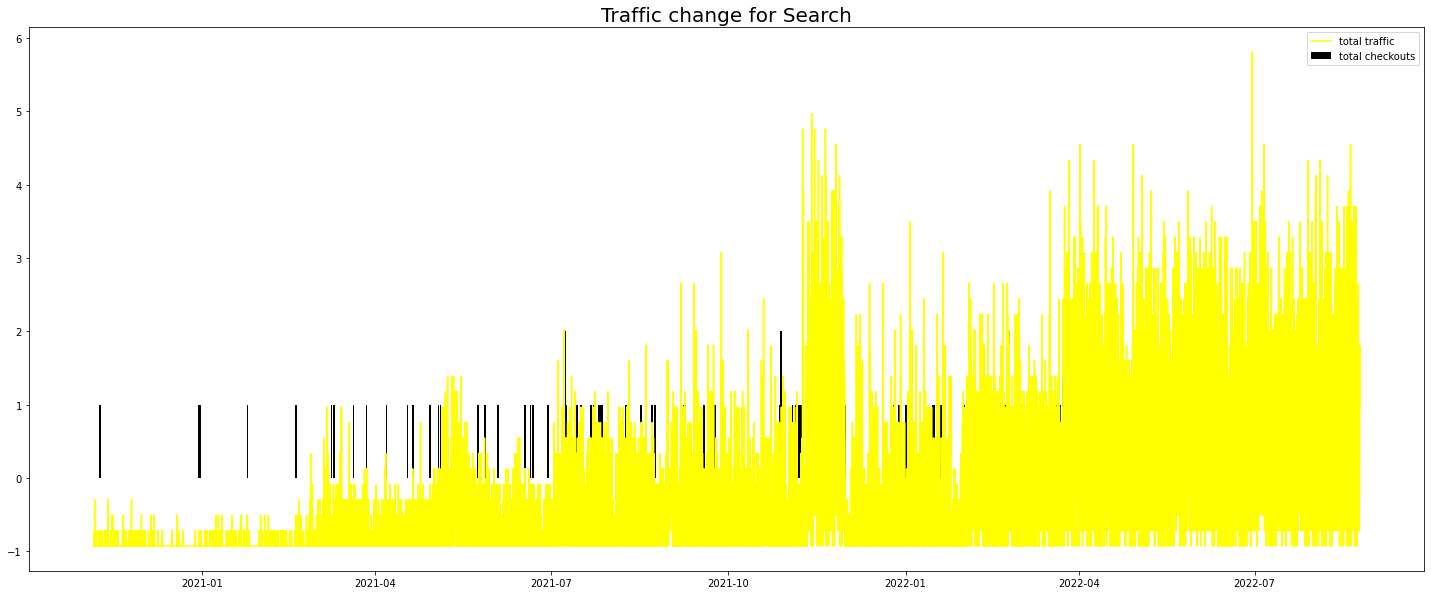

In [303]:
Search = pd.DataFrame(df[df['referrer_source'] == 'Search'])
month_Search = Search.groupby('hour')['total_visitors','total_checkouts','total_orders_placed'].sum()
month_Search = month_Search.reset_index()

month_Search['hour'] = pd.to_datetime(month_Search['hour'])


scaler = StandardScaler()

d = month_Search[['total_visitors']]

totalvistor_scaled = pd.DataFrame(scaler.fit_transform(d))
month_Search = pd.concat([month_Search,totalvistor_scaled],axis=1)
month_Search.columns = ['hour','total_visitors','total_checkouts','total_orders_placed','scaled_total_visitors']

fig,ax = plt.subplots(figsize = (25,10))
ax.plot(month_Search['hour'], month_Search['scaled_total_visitors'], c='yellow',label = 'total traffic')
ax.set_title('Traffic change for Search',fontsize = 20)
ax.bar(month_Search['hour'], month_Search['total_checkouts'],color='black', label = 'total checkouts')

plt.legend()
plt.show()

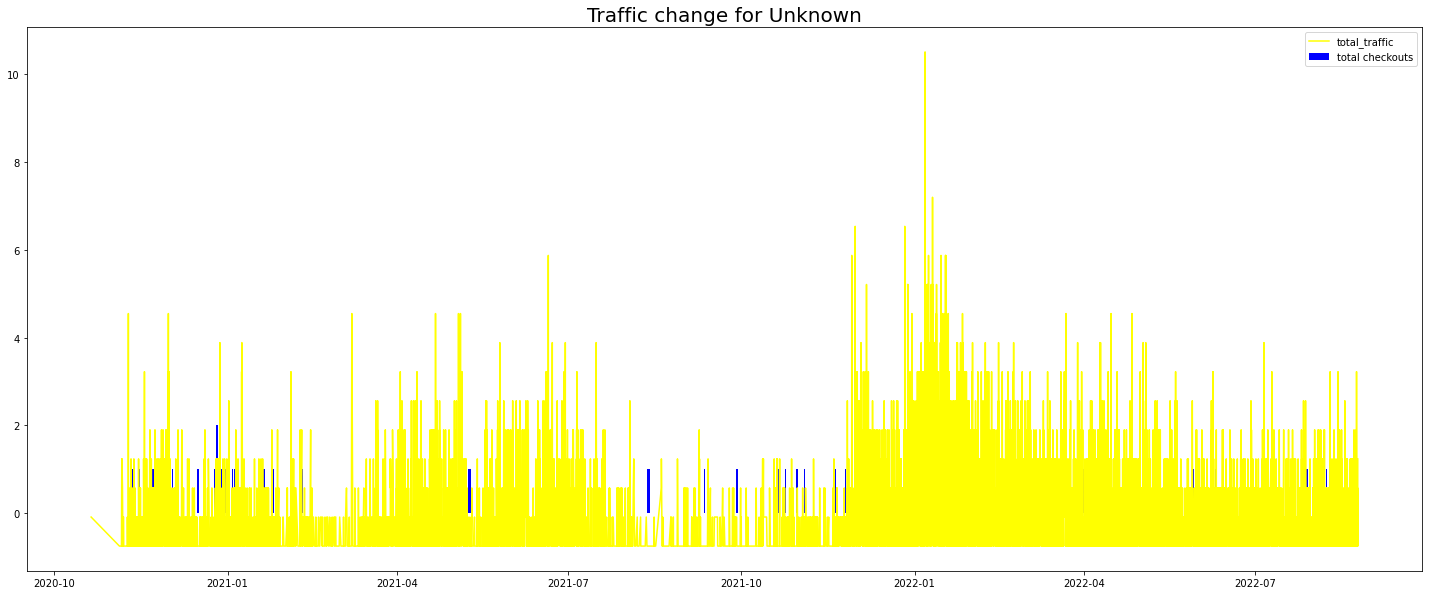

In [304]:
Unknown = pd.DataFrame(df[df['referrer_source'] == 'Unknown'])
month_Unknown = Unknown.groupby('hour')['total_visitors','total_checkouts','total_orders_placed'].sum()
month_Unknown = month_Unknown.reset_index()

month_Unknown['hour'] = pd.to_datetime(month_Unknown['hour'])


scaler = StandardScaler()

d = month_Unknown[['total_visitors']]

totalvistor_scaled = pd.DataFrame(scaler.fit_transform(d))
month_Unknown = pd.concat([month_Unknown,totalvistor_scaled],axis=1)
month_Unknown.columns = ['hour','total_visitors','total_checkouts','total_orders_placed','scaled_total_visitors']

fig,ax = plt.subplots(figsize = (25,10))
ax.plot(month_Unknown['hour'], month_Unknown['scaled_total_visitors'], color='yellow',label='total_traffic') 
ax.set_title('Traffic change for Unknown',fontsize = 20)
ax.bar(month_Unknown['hour'], month_Unknown['total_checkouts'],color='blue', label = 'total checkouts')

plt.legend()
plt.show()

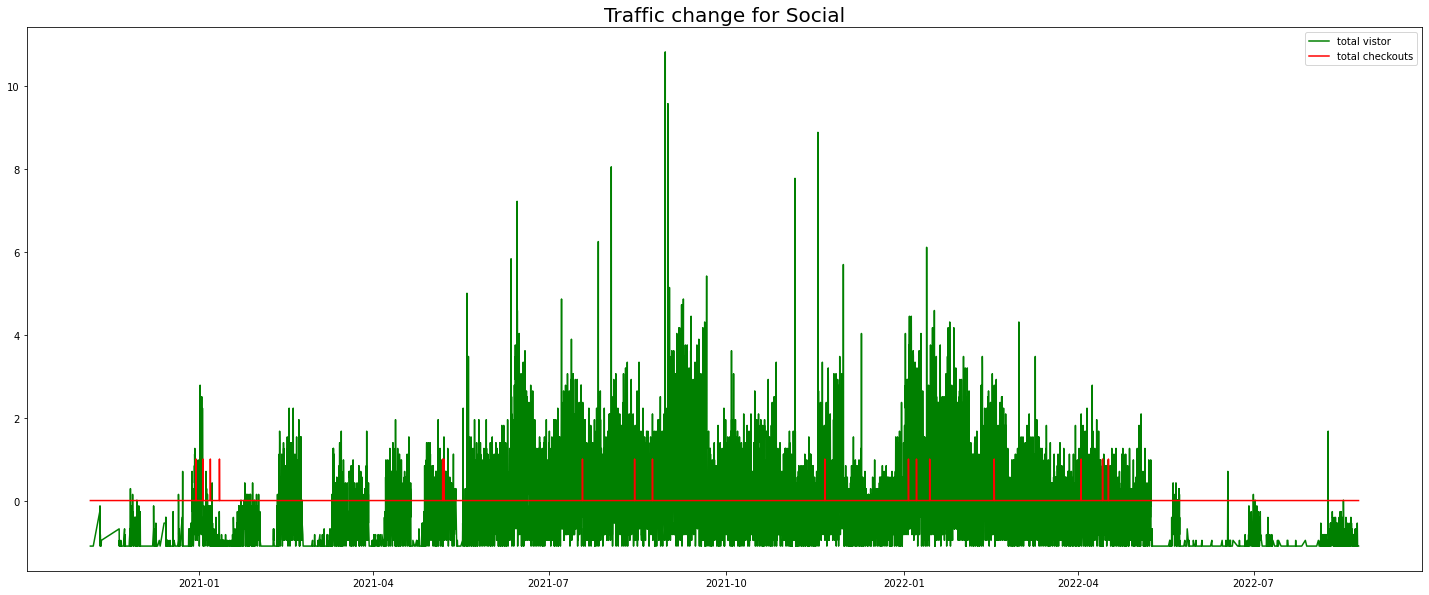

In [305]:
Social = pd.DataFrame(df[df['referrer_source'] == 'Social'])
month_Social = Social.groupby('hour')['total_visitors','total_checkouts','total_orders_placed'].sum()
month_Social = month_Social.reset_index()

month_Social['hour'] = pd.to_datetime(month_Social['hour'])


scaler = StandardScaler()

d = month_Social[['total_visitors']]

totalvistor_scaled = pd.DataFrame(scaler.fit_transform(d))
month_Social = pd.concat([month_Social,totalvistor_scaled],axis=1)
month_Social.columns = ['hour','total_visitors','total_checkouts','total_orders_placed','scaled_total_visitors']

fig,ax = plt.subplots(figsize = (25,10))
ax.plot(month_Social['hour'], month_Social['scaled_total_visitors'], c='green',label = 'total vistor') 
ax.set_title('Traffic change for Social',fontsize = 20)
ax.plot(month_Social['hour'], month_Social['total_checkouts'],c='red', label = 'total checkouts')

plt.legend()
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


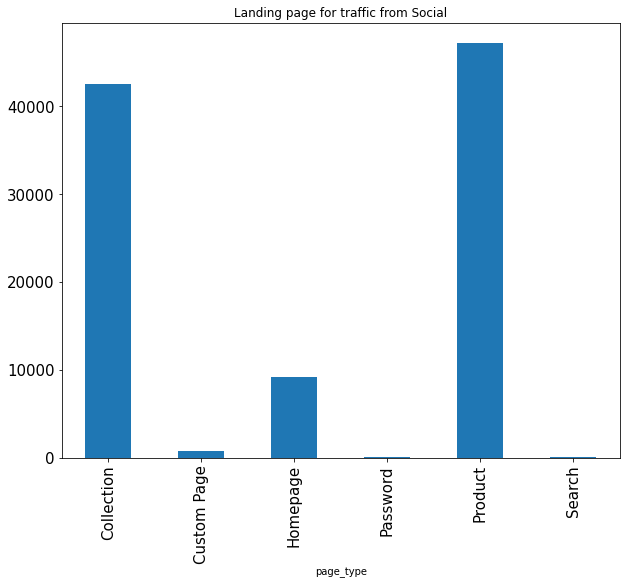

In [306]:
print(f"{Social.groupby('page_type')['page_type'].count().plot(kind='bar',figsize= (10,8),title = 'Landing page for traffic from Social',fontsize = 15)}")


AxesSubplot(0.125,0.125;0.775x0.755)


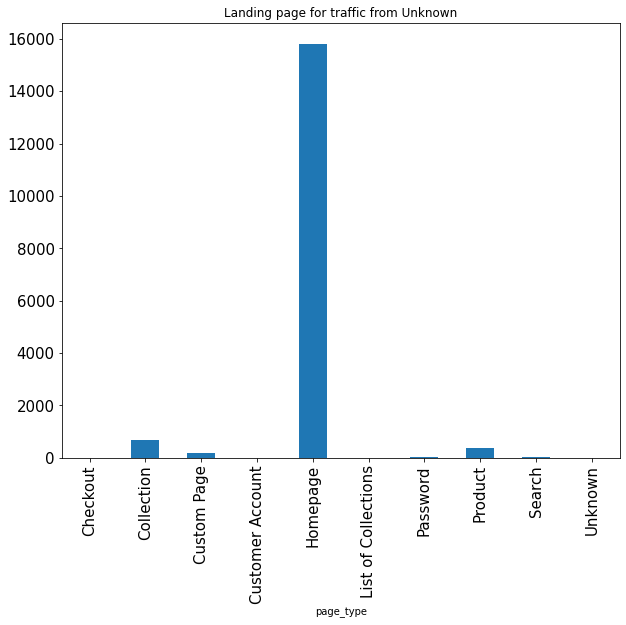

In [307]:
print(f"{Unknown.groupby('page_type')['page_type'].count().plot(kind='bar',figsize= (10,8),title = 'Landing page for traffic from Unknown',fontsize = 15)}")

AxesSubplot(0.125,0.125;0.775x0.755)


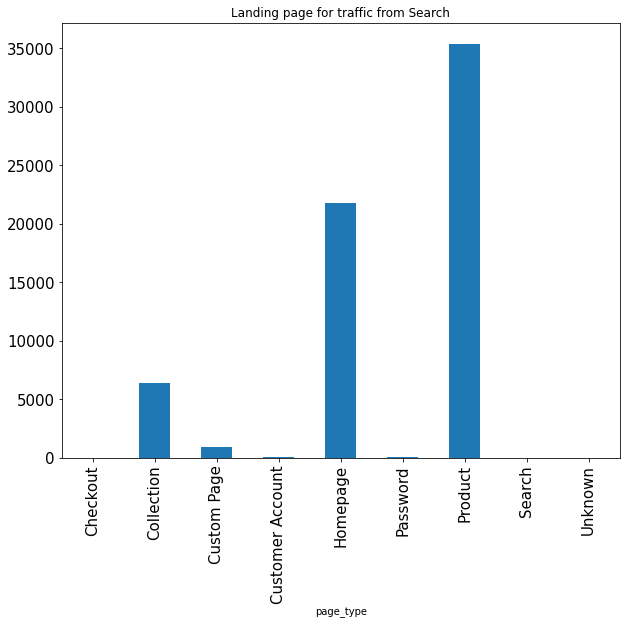

In [308]:
print(f"{Search.groupby('page_type')['page_type'].count().plot(kind='bar',figsize= (10,8),title = 'Landing page for traffic from Search',fontsize = 15)}")


AxesSubplot(0.125,0.125;0.775x0.755)


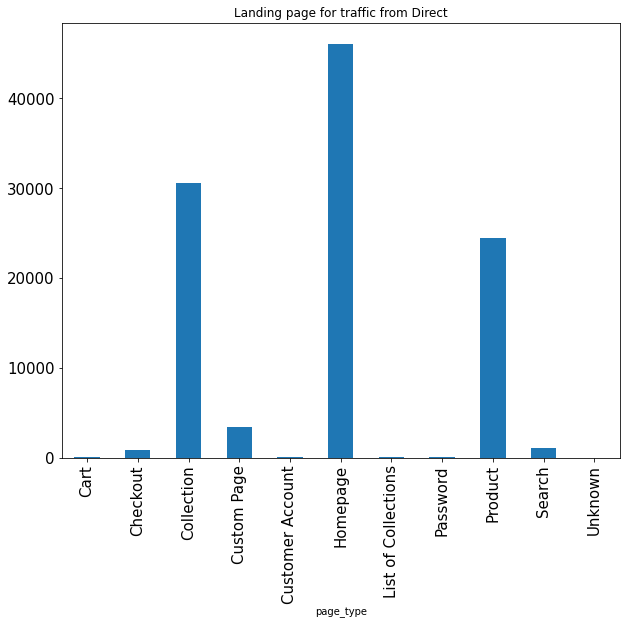

In [309]:
print(f"{Direct.groupby('page_type')['page_type'].count().plot(kind='bar',figsize= (10,8),title = 'Landing page for traffic from Direct',fontsize = 15)}")

In [310]:
# 0-100
'roda-lawrence-lounge-chair-stool|roda-orson-lounger|roda-piper-lounger|roda-surfer-lounger|roda-stem-outdoor-side-table|roda-spinnaker-extendable-outdoor-table|roda-root-outdoor-table|roda-pier-outdoor-dining-table|roda-button-outdoor-table|randomito-hanging-bookcase|random-bookshelf|random-3c-bookshelf|random-2c-bookshelf|flow-chair|flow-slim-dining-chair|flow-textile-dining-chair|flow-chair-leather|flow-chair-iroko|flow-filo-chair|rock-table|arclinea-pocket-system-vina-unit|roda-brick-extendable-dining-table-outdoor|oluce-fresnel-floor-lamp-outdoor|oluce-otto-floor-lamp|oluce-semplice-table-lamp|oluce-duca-table-lamp|oluce-cylinda-table-lamp|oluce-1953-floor-lamp|oluce-1953-table-lamp|oluce-atollo-metal-table-lamp|magis-tavolo-xz3-table|magis-troy-plastic-chair|magis-striped-tavolo-table|magis-steelwood-table|magis-steelwood-stool|magis-steelwood-coat-stand|magis-steelwood-chair|magis-plato-chair|magis-pizza-table|magis-cu-clock|magis-chair-first-set-of-4|magis-air-table-1|360-degree-container|magis-air-table|dada-vela-14|air-chair|armani-dada-kitchen|molteni-closet|dada-kitchen|string-light-suspension-lamp-round|prince-aha-stool|basica-m2-table-lamp|basica-m1-table-lamp|basica-minima-bateria-table-lamp|birillo-waste-bin|birillo-toothbrush-holder|atollo-237-table-lamp|nelson®-cigar®-bubble-suspension-lamp-xl|nelson®-saucer-bubble-suspension-lamp-xl|oluce-minu-coupe-2201|string-light-suspension-lamp|captain-flint-outdoors-wall-sconce|drawing-13-poster-by-ronan-bouroullec-white-wood-frame|drawing-12-poster-by-ronan-bouroullec-white-wood-frame|drawing-11-poster-by-ronan-bouroullec-white-wood-frame|drawing-10-poster-by-ronan-bouroullec-white-wood-frame|drawing-9-poster-by-ronan-bouroullec-white-wood-frame|drawing-8-poster-by-ronan-bouroullec-white-wood-frame|drawing-7-by-ronan-bouroullec-white-wood-frame|panda-poster-by-rop-van-mierlo-white-wood-frame|mandrill-poster-by-rop-van-mierlo-white-wood-frame|jaguar-poster-by-rop-van-mierlo-white-wood-frame|crocodile-poster-by-rop-van-mierlo-white-frame|bear-poster-by-rop-van-mierlo-white-frame|freddo-poster-by-nathalie-du-pasquier-oak-frame|poster-caldo-by-nathalie-du-pasquier-oak-frame|alessi-christmas-ornaments|alessi-birillo-tissue-box|alessi-birillo-liquid-soap-dispenser|alessi-water-tower-container|alessi-glass-family-glass-for-water|alessi-creamer|alessi-sugar-bowl-with-spoon|alessi-moka-espresso-coffee-maker|alessi-glass-family-wine-glass|ligne-roset-roseau-vase|gople-portable-lamp|nava-via-durini-travel-zip-wallet-black|nava-via-durini-zip-wallet-black|smooth-travel-wallet-with-zip-black|nava-milano-leather-travel-tag|milano-briefcase-small-black|milano-briefcase-medium-black|combo-small-backpack-lead-grey|nava-combo-pouch-black|nava-combo-backpack-white|nava-calendone-perpetual-wall-calendar|stow-organizer|smart-hub-pd-wall-charger-with-international-adapter'

# 101-200
'pr-01-speaker|lightning-key-usb-cable-key-chain|lightning-belt-10-charging-cable-for-iphone-and-ipad|lightning-belt-4-charging-cable-for-iphone-and-ipad|eclipse-charger-marble|drop-marquetry-wireless-charger|dock-charger-for-apple-watch|dock-charger-for-iphone-and-ipad|native-union-marquetry-case-for-airpods|native-union-curve-case-for-airpods|clic-marble-case-for-iphone|clic-case-with-card-holder-for-iphone-7-8-se|clic-canvas-case-for-iphone|livingspace-gift-card|saint-esprit-tree-trunk-stool|kartell-mobil-mat-cart|kartell-bellissima-suspension-wood-light|kartell-napoleon-gnome-stool|kartell-upper-stepladder|kartell-battista-folding-serving-cart|gastone-folding-serving-cart|attila-gnome-stool|kartell-componibili-recycled-storage-unit|kartell-eur-outdoor-stool|kabuki-floor-lamp|flos-zeppelin-pendant-light|flos-overlap-pendant-light|alessi-twergi-mp0210-salt-pepper-spice-grinder|alessi-twergi-es19-salt-pepper-spice-grinder|alessi-twergi-es17-corkscrew|alessi-twergi-es16-75-glass-jar-small|alessi-twergi-es16-100-glass-jar-large|alessi-twergi-es15-centrepiece|skyscraper-series-planter|yanzi-sc1-suspension-lamp|yanzi-s1-suspension-lamp|melampo-mini-wall-lamp|melampo-table-lamp|melampo-floor-lamp|yanzi-suspension-lamp|yanzi-floor-lamp|yanzi-table-lamp|laguna-table-lamp|nur-suspension-lamp|new-nature-floor-lamp|sisifo-table-lamp|la-petite-floor-lamp|la-petite-table-lamp|eclittica-table-lamp|come-together-table-lamp|tolomeo-micro-bicolor-table-lamp|platner-ottoman|ktribe-f3-floor-lamp|ktribe-f2-floor-lamp|isamu-noguchi-cyclone-dining-table|four-seasons-barstool|mr-chair-rattan|mr-lounge-chair-cowhide|platner-stool|platner-arm-chair|nevi™-sit-to-stand-table-30d|bon-jour-versailles-table-lamp-small|bon-jour-versailles-table-lamp|bon-jour-unplugged-table-lamp|bon-jour-table-lamp|kelvin-led-floor-lamp|bellhop-floor-lamp|copycat-table-lamp|ktribe-t1-table-lamp|oblique-led-table-lamp|copy-of-1966-dining-table-60-x-60-dark-bronze|copy-of-1966-coffee-table-60-x-60|ode-desk-lamp|capelli-stool|nelson-pedestal-stool|girard-color-wheel-ottoman|eames-storage-unit-4x2|eames-storage-unit-1x1|eames-storage-unit-1x2|eames-storage-unit-2x2|quadrado|boteco-sideboard|linha-dining-table|fil-noir-dining|prince-cord-indoor|jacques|hamilton|alexander|connery|clouds|stendhal|geoffrey|lewa|oxydation|pumpkin|pukka-ottoman|pukka|ottoman|prado'

# 201-300
'ruche|togo|softwing|knoll-saarinen-oval-side-table-black-base|knoll-saarinen-oval-side-table-white-base|iko|juta|duetto|icon|new-bond|nathalie|all-day-planter|everyday-planter|herman-miller-sayl®-chair-wfh-promotion|knoll-saarinen-round-side-table-black-base|herman-miller-mirra-2™-chair-wfh-promotion|knoll-saarinen-round-side-table-white-base|knoll-avio-sofa|kartell-battery-table-lamp|kartell-kabuki-mini-table-lamp|kartell-componibili-classic-storage-unit|moooi-flock-of-light-suspension-lamp|coro-obq-4-patio-umbrella|l3-sunlounger-charcoal-grey|herman-miller-embody®-chair-graphite|aeron®-remastered-chair-graphite-or-onyx|knoll-mr-stool|knoll-mr-lounge-chair|knoll-mr-chaise-lounge|knoll-mr-adjustable-chaise-lounge|knoll-bertoia-molded-outdoor-stool|knoll-bertoia-molded-outdoor-side-chair|herman-miller-oe1-rectangular-table-veneer-top|herman-miller-oe1-rectangular-table|herman-miller-nelson-x-leg-table|herman-miller-lispenard-sofa|herman-miller-eames®-sofa-3-seats|herman-miller-eames-sofa-2-seats|crosshatch®-settee|herman-miller-crosshatch®-ottoman|herman-miller-crosshatch-chair|santa-cole-americana-table-lamp|santa-cole-americana-wall-lamp|herman-miller-nelson™-marshmallow-sofa-fabric|herman-miller-nelson™-marshmallow-sofa|herman-miller-eames-sofa-compact|pedrali-nolita-3657-outdoor-stool|santa-cole-gt6-suspension-lamp|herman-miller-nelson-thin-edge-bedside-table|santa-cole-diana-floor-lamp|nimba-suspension-lamp|nagoya-suspension-lamp|maija-suspension-lamp|m68-suspension-lamp|m64-suspension-lamp|headhat-plate-suspension-lamp|santa-cole-gt1500-suspension-lamp|santa-cole-gt1000-suspension-lamp|santa-cole-gt7-suspension-lamp|santa-cole-gt5-suspension-lamp|santa-cole-tmm-floor-lamp|santa-cole-tripode-floor-lamp|santa-cole-tmc-floor-lamp|americana-floor-lamp|herman-miller-nelson™-thin-edge-bed-veneer-headboard|herman-miller-nelson™-thin-edge-bed-natural-cane-headboard|santa-cole-tripode-table-lamp|santa-cole-maija-table-lamp|santa-cole-diana-table-lamp|santa-cole-gira-table-lamp|santa-cole-tmd-table-lamp|santa-cole-babel-table-lamp|santa-cole-asa-table-lamp|cestita-alubat-table-lamp-portable|santa-cole-fad-menor-table-lamp|santa-cole-fad-fija-floor-lamp|santa-cole-table-lamp|santa-cole-tmd-floor-lamp|santa-cole-fad-floor-lamp|santa-cole-tatu-table-lamp|santa-cole-cestita-metalica-table-lamp|santa-cole-cesta-metalica-table-lamp|santa-cole-fad-table-lamp|santa-cole-cestita-bateria-table-lamp-portable|santa-cole-cesta-table-lamp|bertoia-stool-outdoor-counter-height|bertoia-stool-outdoor-bar-height|bertoia-diamond-chair-outdoor|knoll-bertoia-outdoor-side-chair-fabric-seat-pad|herman-miller-nelson™-outdoor-marble-pedestal-table-28-5|herman-miller-nelson™-outdoor-marble-pedestal-table|herman-miller-nelson™-outdoor-pedestal-table|santa-cole-cestita-table-lamp|herman-miller-eames®-outdoor-marble-coffee-table|herman-miller-eames®-coffee-table|herman-miller-eames®-wire-base-marble-coffee-table|herman-miller-eames®-wire-base-coffee-table|herman-miller-eames®-outdoor-table-square|herman-miller-eames®-marble-outdoor-table-square|herman-miller-eames®-outdoor-marble-table-round'

# 301-400
'herman-miller-eames®-outdoor-table-round|eames®-outdoor-table-rectangular|knoll-olivares-aluminum-chair|maya-lin-outdoor-stone-coffee-table|knoll-maya-lin-outdoor-stone-stool|knoll-piton-outdoor-stool|knoll-risom-outdoor-ottoman|knoll-risom-outdoor-lounge-chair|knoll-risom-outdoor-coffee-table|knoll-saarinen-outdoor-coffee-table-20-35|knoll-stromborg-outdoor-dining-table-rectangular|knoll-stromborg-outdoor-dining-table-square|knoll-stromborg-outdoor-dining-table-round|knoll-saarinen-outdoor-dining-table-54-78|knoll-saarinen-executive-chair-with-casters-armless|knoll-ollo-light-task-chair-light-grey|copy-of-saarinen-executive-chair-with-casters|knoll-ollo-light-task-chair-all-black|knoll-saarinen-executive-chair-with-casters-with-arms|brokis-geometric-suspension-lamp-oval-2-3-full|brokis-geometric-suspension-lamp-oval-1-3-full|brokis-geometric-suspension-lamp-circle-1-2-full|brokis-geometric-suspension-lamp-oval-full-top|geometric-suspension-lamp-oval-full-bottom|brokis-geometric-suspension-lamp-full-circle|artemide-tizio-table-lamp|artemide-tizio-floor-lamp|artemide-callimaco-floor-lamp|artemide-nh-s3-suspension-lamp|artemide-nh-s2-suspension-lamp|artemide-nh-s1-suspension-lamp|artemide-nh-s3-2-arms-suspension-lamp|artemide-nh-table-lamp|brokis-knot-suspension-lamp-small|artemide-nh-wall-lamp|artemide-nh-s4-circular-suspension-lamp|artemide-nh-s5-elliptic-ceiling-lamp|artemide-nh-suspension-lamp|artemide-nh-floor-lamp|brokis-muffins-anniversary-table-floor-lamp|brokis-muffins-suspension-lamp|brokis-muffins-floor-lamp|brokis-muffins-table-floor-lamp|brokis-jack-o-lantern-suspension-lamp|brokis-jack-o-lantern-table-lamp-large|brokis-jack-o-lantern-table-lamp-small|brokis-mona-suspension-lamp-xl|brokis-mona-suspension-lamp-large|brokis-mona-suspension-lamp-medium|brokis-mona-floor-lamp|brokis-mona-table-lamp|brokis-mona-wall-lamp|brokis-balloons-table-floor-lamp|gan-rugs-hidraulic-area-rug|gan-rugs-round-mirage-area-rug|gan-rugs-mirage-area-rug|gan-rugs-degrade-area-rug|gan-rugs-diamond-area-rug|gan-rugs-naidu-area-rug|gan-rugs-zoe-kubb-area-rug|gan-rugs-zoe-sool-area-rug|qlocktwo-custom-colour-blue-cobalt-with-grey-body-classic|saarinen-executive-chair-with-molded-plastic-back-wood-legs|saarinen-executive-chair-with-molded-plastic-back-tubular-legs|qlocktwo-creators-edition-rust-with-black-body|qlocktwo-touch-pure-vanilla-sugar|qlocktwo-qolor-black-iced-tea-classic|artemide-demetra-wall-spot|artemide-demetra-micro-wall-lamp|artemide-demetra-wall-lamp|artemide-demetra-professional-led-wall-lamp|artemide-demetra-professional-led-floor-lamp|artemide-demetra-floor-lamp|artemide-demetra-professional-led-table-lamp-with-clamp|artemide-demetra-professional-led-table-lamp-with-base|artemide-demetra-micro-table-lamp-with-base|artemide-demetra-table-lamp-with-clamp|artemide-demetra-table-lamp-with-base|artemide-gople-mini-table-lamp|28-3-floor-lamp|artemide-gople-table-lamp|artemide-gople-floor-lamp|artemide-gople-mini-suspension-lamp|artemide-gople-suspension-lamp|artemide-gople-ceiling-lamp|artemide-gople-mini-ceiling-lamp|coro-doccia-shower-with-nebulizer|coro-l3-sunlounger-black|coro-shot-dining-table|coro-sg1-low-table|coro-p01-lounge-chair|coro-sb01-dining-chair-with-arms|moooi-monster-chair-naked|moooi-monster-chair-diamond|moooi-the-golden-chair-fabric|moooi-the-golden-chair|moooi-pig-table|moooi-raimond-tensegrity-floor-lamp|moooi-carbon-bar-stool|carbon-chair'

# 401-500
'the-party-wall-lamp|rabbit-table-lamp|moooi-pet-table-lamp|smoke-chandelier|random-ii-suspension-lamp|raimond-suspension-lamp|meshmatics-chandelier|heracleum-the-big-o-suspension-lamp|heracleum-ii-suspension-lamp|heracleum-endless-suspension-lamp|paper-wall-lamp|paper-chandelier|moooi-planetas-rectangular-area-rug|paper-table-lamp|paper-floor-lamp|moooi-ginko-leaf-round-area-rug|moooi-dear-ingo-suspension-lamp|skillrow|skillmill-go|technogym-bench|skillbike|moooi-ginko-leaf-rectangular-area-rug|moooi-garden-of-eden-round-area-rug|moooi-garden-of-eden-rectangular-area-rug|moooi-dutch-sky-area-rug|moooi-edward-van-vliet-diamond-tree-area-rug|moooi-edward-van-vliet-celestial-area-rug|myrun-treadmill|moooi-megan-grehl-area-rug|moooi-yarn-box-bead-round-area-rug|moooi-yarn-box-bead-rectangular-area-rug|moooi-yarn-box-tangle-area-rug|moooi-yarn-box-bow-area-rug|moooi-swell-oval-area-rug|moooi-swell-round-area-rug|moooi-maze-round-area-rug|moooi-maze-square-area-rug|moooi-maze-rectangular-area-rug|caper-stacking-chair-without-arms|herman-miller-caper-stacking-chair-with-arms|moooi-nordics-crystal-area-rug|moooi-reflection-round-area-rug|moooi-reflection-square-area-rug|moooi-reflection-rectangular-area-rug|moooi-double-shade-floor-lamp|moooi-walking-on-clouds-square-area-rug|bike-personal-exercise-bike|moooi-t-lamp-floor-lamp|moooi-walking-on-clouds-round-area-rug|moooi-walking-on-clouds-rectangular-area-rug|moooi-space-escape-reptilian-area-rug|moooi-space-escape-plejaren-area-rug|moooi-set-up-shades-floor-lamp|moooi-space-escape-draconian-area-rug|moooi-blended-area-rug-5-colors|moooi-blended-area-rug-4-colors|moooi-extra-colorways-round-area-rug|moooi-fluid-rectangular-area-rug|moooi-fluid-area-rug|moooi-trichroic-shapes-area-rug|moooi-trichroic-duo-area-rug|moooi-trichroic-round-area-rug|moooi-indigo-macaque-area-rug|moooi-bearded-leopard-ii-area-rug|moooi-perch-wall-lamp|moooi-perch-branch-suspension-lamp|moooi-bearded-leopard-i-area-rug|moooi-aristo-quagga-area-rug|moooi-armoured-boar-area-rug|moooi-extinct-animals-round-area-rug|moooi-extinct-animals-rectangular-area-rug|moooi-menagerie-of-extinct-animals-round-area-rug|moooi-menagerie-of-extinct-animals-rectangular-area-rug|moooi-rendezvous-tokyo-round-blue-area-rug|moooi-rendezvous-tokyo-rectangular-blue-area-rug|moooi-patina-round-area-rug|moooi-patina-rectangular-area-rug|run-personal-treadmill|moooi-horizon-round-area-rug|moooi-horizon-rectangular-area-rug|moooi-morning-round-area-rug|moooi-morning-rectangular-area-rug|moooi-erosion-round-area-rug|moooi-erosion-rectangular-area-rug|moooi-canvas-round-area-rug|moooi-canvas-rectangular-area-rug|moooi-jaquard-woven-area-rug|moooi-single-shape-round-area-rug|moooi-single-shape-rectangular-area-rug|moooi-s-f-m-area-rug|moooi-fools-paradise-round-area-rug|moooi-fools-paradise-rectangular-area-rug|moooi-eden-queen-round-area-rug|moooi-eden-queen-square-area-rug|moooi-eden-queen-rectangular-area-rug|moooi-eden-queen-black-and-white-round-area-rug|moooi-perch-floor-lamp|moooi-eden-queen-black-and-white-area-rug-square|eden-queen-black-and-white-square|moooi-eden-queen-black-and-white-area-rug-rectangle'

# 501-600
'moooi-monster-area-rug|baccarat-harcourt-1841-glass|baccarat-harcourt-1841-highball-tumbler-set-of-2|baccarat-bearbrick-bear-figurine|baccarat-narcisse-champagne-coupe|baccarat-narcisse-glass|baccarat-jcb-passion-wine-glass|baccarat-candy-light-suspension-lamp|baccarat-harcourt-1841-whiskey-decanter|caper-multipurpose-chair|herman-miller-airia-media-cabinet|herman-miller-airia-desk|herman-miller-high-back-cosm-chair-dipped-in-color|herman-miller-mid-back-cosm-chair-dipped-in-color|herman-miller-low-back-cosm-chair-dipped-in-color|herman-miller-distil-desk|herman-miller-distil-table|herman-miller-aeron-remastered-chair-mineral-or-carbon|73-1m|73-11|73-8|73-3|73-1|38-11v-suspension-light|38-8v-suspension-light|38-3v-suspension-light|38-1vm-suspension-light|38-1v-suspension-light|bocci-28-37-cluster-suspension-light|bocci-28-19-cluster-suspension-light|bocci-28-1-suspension-light|14-1m-suspension-light|bocci-28-7-cluster-suspension-light|bocci-28-3-cluster-suspension-light|bocci-28-11-random-suspension-light|bocci-28-9-linear-suspension-light|bocci-28-7-random-suspension-light|bocci-28-5-random-suspension-light|bocci-28-3-random-suspension-light|bocci-28-1m-suspension-light|bocci-14-11-suspension-light|bocci-84-table-lamp|bocci-14-7-suspension-light|bocci-14-5-suspension-light|bocci-14-3-suspension-light|bocci-73-table-lamp|bocci-14-1-suspension-light|bocci-57-colors-table-lamp|bocci-57-dark-mirrored-table-lamp|bocci-38v-table-lamp|bocci-21-11-suspension-light|bocci-28-colors-table-lamp|bocci-28-clear-table-lamp|white-glove-service|bocci-21-7-cluster-suspension-light|bocci-21-7-suspension-light|bocci-21-5-suspension-light|bocci-21-1m-suspension-light|bocci-21-3-suspension-light|bocci-21-1-suspension-light|touch-pure|stainless-steel-classic|alessi-cha-kettle|alessi-il-conico-kettle|alessi-9093-michael-graves-bird-kettle|alessi-9091-water-kettle-with-steel-bottom|qlocktwo-stainless-steel|bosa-trade-issima-vase|creators-edition-silver-and-gold|matte-powder-coated-stainless-steel-white-pepper-chinese|bosa-trade-ariete-container|bosa-trade-toro-container|bosa-trade-unicorno-container|bosa-trade-stripy-vase|bosa-trade-i-fantasmini-sculpture|bosa-trade-oh-baby-it-is-a-wild-world-sculpture|taraxacum-88-suspension-lamp|last-order-table-lamp|lampadina-led-table-lamp|primates-kandti-vase|may-day-utility-lamp|cut-vase|fucsia-pendant-light|parentesi-pendant-lamp|smithfield-pendant-light|camouflage-outdoor-wall-sconce|bellhop-wall-and-ceiling-outdoor-lighting|bellhop-portable-table-lamp|arrangements-pendant-light-6|arrangements-pendant-light-5|arrangements-pendant-light-4|arrangements-pendant-light-3|arrangements-pendant-light-2|arrangements-pendant-light-1|captain-flint-outdoor-floor-lamp|ic-lights-outdoor-floor-lamp|captain-flint-led-floor-lamp|tab-led-floor-lamp-90-degree-rotating-head|superloon-floor-lamp|snoopy-table-lamp'

# 601-700
'gaku-accessories|gaku-wireless-table-floor-lamp|bossa-nova-side-table|gaku-wire-table-floor-lamp|mickey-forever-young-90th-anniversary-sculpture|gabu-mall-hat-candle-holder|georgio-cool-hat-candle-holder|blue-pablo-candle-holder|maestro-vase|tatou-floor-lamp|tatou-table-lamp|tatou-suspension-lamp|t-table-side-table|geopablo-vase|hopebird-sculpture|spun-light-floor-lamp|spun-light-table-lamp|skygarden-recessed-ceiling-light|skygarden-suspension-lamp|bernardo-panda-sculpture|dab-penguin-sculpture|ray-floor-lamp|owls-container|ray-table-lamp|ray-suspension-lamp|qlocktwo-qolor-classic|matte-powder-coated-stainless-steel|noctambule-led-floor-lamp-cone-bowl-top-and-cylinders-with-large-base|noctambule-led-floor-lamp-cone-top-with-small-base|noctambule-led-floor-lamp-tall-cylinders-with-small-base|noctambule-led-floor-lamp-short-cylinders-with-small-base|noctambule-led-suspension-lamp-tall-cylinders|noctambule-led-suspension-lamp-short-cylinders|noctambule-led-suspension-lamp-cone-shade|creators-edition|noctambule-led-suspension-lamp-bowl-shade|kelvin-led-green-mode-1-table-lamp-with-adjusting-sensor|kelvin-edge-led-table-lamp-with-optical-switch|ic-lights-double-ceiling-wall-sconce|ic-lights-ceiling-wall-sconce|flos-ic-lights-suspension-lamp|ic-lights-floor-lamp|ic-lights-table-lamp|glo-ball-wall-sconce|glo-ball-ceiling-sconce|glo-ball-ceiling-wall-zero-sconce|mini-glo-ball-ceiling-wall-sconce|glo-ball-floor-lamp|glo-ball-table-lamp|glo-ball-basic-table-lamp|mini-glo-ball-table-lamp|glo-ball-basic-zero-table-lamp|tolomeo-clip-spot|tolomeo-mega-wall-lamp|tolomeo-shade-wall-lamp|tolomeo-wall-spot-with-switch|tolomeo-wall-spot-without-switch|tolomeo-with-shade-wall-lamp-with-j-bracket|tolomeo-with-shade-wall-lamp-with-s-bracket|guns-floor-lamp|guns-bedside-table-lamp|tolomeo-wall-lamp-with-j-bracket-1|tolomeo-wall-lamp-with-s-bracket-dimmable|glo-ball-suspension-lamp|tolomeo-wall-lamp-with-s-bracket|tolomeo-off-center-with-shade-suspension-lamp|tolomeo-off-center-suspension-lamp|tolomeo-mega-suspension-lamp|tolomeo-double-shade-suspension|tolomeo-double-suspension|tolomeo-with-shade-table-lamp|dioscuri-wall-ceiling-lamp|led-net-ceiling-lamp|dioscuri-table-lamp|led-net-suspension-lamp|logico-wall-sconce|tolomeo-shade-floor-lamp|tolomeo-reading-floor-lamp|tolomeo-mega-floor-lamp|tolomeo-maxi-floor-lamp|tolomeo-floor-lamp|tolomeo-table-lamp|tolomeo-table-lamp-dimmable|logico-ceiling-lamp-triple|splugen-brau-ceiling-lamp|arco-floor-lamp|gatto-table-lamp|taccia-small-table-lamp|taccia-table-lamp-with-plastic-diffuser|taccia-table-lamp-with-glass-diffuser|logico-ceiling-lamp-single|logico-suspension-lamp-triple|logico-suspension-lamp-single|logico-table-lamp|risom-ottoman|risom-lounge-chair|risom-lounge-chair-with-arms|risom-sitting-stool|risom-side-chair-with-webbed-seat-and-back|ipno-glass-suspension-light'

# 701-800
'generation-work-chair-by-knoll-1|generation-work-chair-by-knoll|newson-aluminum-chair|newson-aluminum-chair-with-arms|castore-floor-lamp|castore-table-lamp|castore-suspension-lamp|viscontea-suspension-lamp|toio-floor-lamp|taraxacum-2|taraxacum-1|2097-50-suspension-lamp|2097-30-suspension-lamp|2097-18-suspension-lamp|volcano-pendant|crystal-rock-table-lamp|spacey-pendant|globe-metro-pendant|neverending-glory-prague-estate-theatre-small-pendant|neverending-glory-prague-estate-theatre-medium-pendant|neverending-glory-metropolitan-opera-small-pendant|neverending-glory-metropolitan-opera-medium-pendant|neverending-glory-palais-garnier-small-pendant|neverending-glory-palais-garnier-medium-pendant|guns-table-lamp|neverending-glory-prague-estate-theatre-pendant|neverending-glory-metropolitan-opera-pendant|neverending-glory-palais-garnier-pendant|lasvit-neverending-glory-la-scala-pendant-large|neverending-glory-bolshoi-theatre-pendant|press-floor-lamp|press-pendant|moulds-table-lamp|moulds-pendant|cipher-wall-sconce|cipher-table-lamp|cipher-horizontal-pendant|cipher-floor-lamp|embody-chair-graphite|embody-chair-white|coming-soon-moooi|coming-soon-lasvit|aplomb-large|eames-lounge-leather-chair-and-ottoman-classic-size|swoop-work-table|swoop-coffee-table|eames-molded-plywood-coffee-table-metal-base|eames-molded-plywood-coffee-table-wood-base|noguchi-rudder-table|noguchi-table|striad-low-back-lounge-chair-wire-base-leather|striad-low-back-lounge-chair-4-star-swivel-base-leather|striad-low-back-lounge-chair-wire-base-fabric|striad-low-back-lounge-chair-4-star-swivel-base-fabric|eames-lounge-chair-and-ottoman-ebony|eames-lounge-chair-and-ottoman-white-ash|eames-lounge-mohair-chair-and-ottoman-classic-size|eames-lounge-leather-chair-classic-size|eames-molded-plastic-side-chair-white-ash-dowel-base-upholstered|eames-molded-plastic-side-chair-ebony-dowel-base-upholstered|eames-molded-plastic-side-chair-wire-base-upholstered|eames-molded-plastic-side-chair-walnut-dowel-base-upholstered|eames-molded-plastic-side-chair-4-leg-base-upholstered|eames-aluminum-group-side-chair-outdoor-1|nevi-sit-to-stand-table|nelson-swag-leg-desk|tone-personal-light|flute-personal-light|tu-utility-tray|tu-w-pull-freestanding-lateral-file|tu-w-pull-mobile-pedestal|nelson-platform-bench-wood-base|nelson-platform-bench-chrome-base|aim-pendant-light|aim-small-pendant-light|saarinen-round-dining-table-black-laminate-black-base-35-60|saarinen-oval-dining-table-black-laminate-black-base-72-96|petal-end-table|petal-coffee-table|petal-dining-table|1966-double-rocker|1966-single-rocker|1966-coffee-table-90-x-38|1966-coffee-table-60-x-38|1966-coffee-table-60-x-18|1966-coffee-table-38-x-38|1966-coffee-table-32-x-20|1966-coffee-table-28-x-28|1966-end-table|1966-three-seat-lounge|1966-two-seat-lounge|1966-ottoman|1966-lounge-chair|1966-adjustable-chaise|1966-contour-chaise|1966-high-table-60-x-60|1966-high-table-60-x-18|1966-high-table-38-x-38|1966-high-table-28-x-28|1966-dining-table-60-x-60'

# 801-900
'1966-dining-table-60-x-38|1966-dining-table-38-x-38|1966-serving-cart|1966-stool-counter-height|1966-stool-bar-height|1966-dining-chair-armless|1966-dining-chair-with-arms|spark-lounge-chair-fabric-seat-pad|spark-lounge-chair|spark-side-chair-fabric-seat-pad|spark-side-chair|brno-chair-flat-bar-leather|brno-chair-flat-bar-fabric|brno-chair-tubular-leather|brno-chair-tubular-fabric|bertoia-stool-counter-height-full-cover|bertoia-stool-counter-height-leather-seat-pad|bertoia-stool-counter-height-fabric-seat-pad|bertoia-stool-bar-height-full-cover|bertoia-stool-bar-height-leather-seat-pad|bertoia-stool-bar-height-fabric-seat-pad|bertoia-molded-shell-side-chair-stacking|bertoia-molded-shell-side-chair|bertoia-side-chair-full-cover|bertoia-side-chair-leather-seat-pad|bertoia-side-chair-fabric-seat-pad|bertoia-side-chair|saarinen-tulip-armless-chair-leather|saarinen-tulip-armchair-leather|saarinen-tulip-armless-chair-upholstered|saarinen-tulip-armchair-upholstered|saarinen-tulip-armchair-fabric|knoll-tulip-armless-chair-fabric|saarinen-executive-stool-bar-height-leather|saarinen-executive-stool-bar-height-fabric|saarinen-executive-stool-counter-height-leather|saarinen-executive-stool-counter-height-fabric|saarinen-executive-armchair-leather|saarinen-executive-armchair-fabric|saarinen-executive-chair-armless-leather|saarinen-executive-chair-armless-fabric|pilot-ottoman|jehs-laub-ottoman-1|jehs-laub-lounge-chair|durso-swivel-chair-leather|womb-ottoman-velvet|womb-chair-velvet|womb-settee-velvet|florence-knoll-lounge-chair-leather|florence-knoll-three-seat-bench-leather|florence-knoll-two-seat-bench-leather|florence-knoll-relaxed-lounge-chair-leather|florence-knoll-relaxed-sofa-leather|florence-knoll-relaxed-settee-leather|florence-knoll-square-relaxed-leather-bench-37-56|florence-knoll-relaxed-two-three-seat-bench-leather|florence-knoll-relaxed-stool-leather|saarinen-oval-coffee-table-white-laminate-42|saarinen-oval-coffee-table-white-42|saarinen-round-coffee-table-grey-base|saarinen-round-coffee-table-black-base|saarinen-round-dining-table-white-laminate-grey-base-35-60|saarinen-round-dining-table-marquina-marble-black-base-35-60|saarinen-round-dining-table-carrara-marble-white-base-35-60|saarinen-oval-dining-table-laminate-white-grey-base-72-96|saarinen-oval-dining-table-marquina-marble-black-base-72-96|saarinen-oval-dining-table-carrara-marble-white-base-72-96|platner-metallic-bronze-coffee-table-36|platner-metallic-bronze-side-table|platner-polished-nickel-side-table|platner-metallic-bronze-dining-table|extremis-pantagruel-picnic-table-hellwood|extremis-pantagruel-table-hellwood|extremis-pantagruel-high-table-hellwood|low-back-cosm-chair-studio-white|mid-back-cosm-chair-studio-white|high-back-cosm-chair-studio-white|eames-soft-pad-management-guest-chair|setu-chair-studio-white-with-no-arms|setu-chair-studio-white-with-arms|setu-chair-graphite-with-no-arms|sayl-chair-fully-loaded-studio-white-frame|mirra-2-chair-fully-loaded-studio-white|mirra-2-chair-fully-loaded-graphite|platner-polished-nickel-dining-table|saarinen-oval-dining-table-white-laminate-white-base-72-96|saarinen-round-dining-table-white-laminate-white-base-35-60|florence-knoll-low-coffee-table-47-x-47|florence-knoll-low-coffee-table-35-x-35|florence-knoll-coffee-table-23-x-23|florence-knoll-coffee-table-45-x-22|barcelona-table|platner-polished-nickel-coffee-table-36|florence-knoll-relaxed-stool-fabric|florence-knoll-relaxed-bench-square-fabric-37-56|florence-knoll-relaxed-two-three-seat-bench-fabric|florence-knoll-bench-three-seat-fabric|florence-knoll-two-seat-bench-fabric|bertoia-bench-outdoor|bertoia-bench'

# 901-1000
'barcelona-couch|florence-knoll-relaxed-sofa-fabric|florence-knoll-relaxed-settee-fabric|kn05-settee|womb-settee-fabric|durso-swivel-chair-fabric|jehs-laub-ottoman-pedestal|jehs-laub-swivel-lounge-chair|pilot-low-back-swivel-chair|pilot-high-back-swivel-chair|kn01-swivel-lounge-chair|kn04-lounge-chair|kn02-swivel-and-reclining-high-back-lounge-chair|wassily-chair-canvas-seat|wassily-chair-leather|platner-easy-chair-velvet|bertoia-bird-chair|bertoia-diamond-chair-full-cover|bertoia-diamond-chair|platner-lounge-chair-velvet|florence-knoll-relaxed-lounge-chair-fabric|florence-knoll-lounge-chair-fabric|barcelona-chair|womb-ottoman-fabric|womb-chair-fabric|saarinen-oval-coffee-table-black-base|saarinen-round-coffee-table-white-base|eames-hang-it-all|nelson-pear-lotus-floor-lamp|nelson-cigar-lotus-floor-lamp|nelson-pear-lotus-table-lamp|nelson-ball-lotus-table-lamp|nelson-cigar-lotus-table-lamp|nelson-lantern-tripod-lamp|nelson-pear-tripod-lamp|nelson-ball-tripod-lamp|nelson-cigar-tripod-lamp|nelson-pear-wall-sconce|nelson-saucer-wall-sconce|nelson-ball-wall-sconce|nelson-cigar-wall-sconce|nelson-triple-bubble-lamp-fixture|nelson-ball-crisscross-bubble-suspension-lamp|nelson-pear-crisscross-bubble-suspension-lamp|nelson-cigar-crisscross-bubble-suspension|nelson-saucer-crisscross-bubble-suspension-lamp|nelson-lantern-bubble-suspension-lamp|nelson-propeller-bubble-suspension-lamp|nelson-apple-bubble-suspension-lamp|nelson-pear-bubble-suspension-lamp|nelson-ball-bubble-suspension-lamp|nelson-cigar-bubble-suspension-lamp|nelson-orbit-suspension-lamp|nelson-angled-sphere-suspension-lamp|nelson-roll-suspension-lamp|nelson-bell-bubble-suspension-lamp|nelson-saucer-bubble-suspension-lamp|eames-aluminum-group-lounge-chair-outdoor|eames-aluminum-group-side-chair-outdoor|eames-aluminum-group-side-chair|eames-aluminum-group-lounge-chair|eames-aluminum-group-ottoman-outdoor|eames-aluminum-group-ottoman|eames-soft-pad-ottoman|eames-soft-pad-executive-chair|eames-soft-pad-management-chair-arms|eames-aluminum-group-executive-chair|eames-aluminum-group-management-chair|eames-molded-wood-stool-bar-height|eames-molded-wood-stool-counter-height|eames-molded-plastic-stool-bar-height-upholstered|eames-molded-plastic-stool-bar-height|eames-molded-plastic-stool-counter-height-upholstered|eames-molded-plastic-stool-counter-height|eames-walnut-stool|swoop-lounge-chair|eames-molded-plywood-dining-chair-with-wood-base-upholstered|eames-molded-plywood-dining-chair-with-metal-base-upholstered|eames-molded-plywood-dining-chair-dcw|eames-molded-plywood-dining-chair-with-metal-base|eames-molded-wood-side-chair-4-leg-base|eames-molded-wood-side-chair-dowel-base|eames-molded-wood-side-chair-wire-base|eames-molded-plastic-armchair-4-leg-base|eames-molded-plastic-armchair-dowel-base|eames-molded-plastic-armchair-wire-base|eames-molded-plastic-side-chair-4-leg-base|eames-molded-plastic-side-chair-dowel-base|eames-molded-plastic-side-chair-wire-base|setu-chair-graphite-with-arms|sayl-chair-fully-loaded-black-frame|high-back-cosm-chair-graphite|mid-back-cosm-chair-graphite|low-back-cosm-chair-graphite|extremis-pantagruel-high-table-iroko|extremis-pantagruel-table-iroko|extremis-acacia-parasol|extremis-walrus-seat-with-armrest-side-table-r-l|extremis-walrus-foot-stool|extremis-walrus-middle-seat'

# 1000+
'extremis-walrus-corner-seat-right-left|extremis-walrus-club-chair|extremis-inumbra-parasol|extremis-pantagruel-picnic-table-iroko|extremis-virus-5-seat-table|extremis-virus-4-seat-table|extremis-virus-3-seat-table|extremis-romeo-juliet-bench|extremis-picnik-outdoor-table|extremis-bistroo-picnic-table|extremis-tiki-stackable-low-stool|tiki-stackable-counter-stool|extremis-tiki-stackable-bar-stool|tab-led-table-lamp-90-rotatable-head|bocci-28-6-floor'

'extremis-walrus-corner-seat-right-left|extremis-walrus-club-chair|extremis-inumbra-parasol|extremis-pantagruel-picnic-table-iroko|extremis-virus-5-seat-table|extremis-virus-4-seat-table|extremis-virus-3-seat-table|extremis-romeo-juliet-bench|extremis-picnik-outdoor-table|extremis-bistroo-picnic-table|extremis-tiki-stackable-low-stool|tiki-stackable-counter-stool|extremis-tiki-stackable-bar-stool|tab-led-table-lamp-90-rotatable-head|bocci-28-6-floor'

## Product Analysis 

In [311]:
file = pd.read_csv('/Users/haitonghuang/Downloads/sales_order_product name - Product_names_all.csv')
#file = file.drop('Unnamed: 0' , axis = 1)
#file.columns = ['names']
df['page_path'] =  df['page_path'].str.upper()
url = df['page_path'].astype(str).str.upper().tolist()

name = file['names'].astype(str).str.upper()
name = pd.DataFrame(name.str.replace('®' , '').replace('™',''))

#### Products interested from users came from all traffic

In [312]:
# **************************************************************
lis = []
for i in url:
    for j in name['names']:
        if j in i:
            lis.append(j)
            
        else:
            continue
            
frame = pd.DataFrame(pd.DataFrame(lis,columns = ['names'])['names'].value_counts())
frame#.to_csv(r'/Users/haitonghuang/Downloads/product_interest_all.csv', index = True, header=True) 

,names
OTTOMAN,17506
EAMES-LOUNGE-LEATHER-CHAIR-AND-OTTOMAN-CLASSIC-SIZE,14391
WOMB-CHAIR-VELVET,12629
KNOLL-TULIP-ARMLESS-CHAIR-FABRIC,8551
AIR-CHAIR,2257
...,...
NEW-NATURE-FLOOR-LAMP,1
SANTA-COLE-DIANA-TABLE-LAMP,1
YANZI-TABLE-LAMP,1
ARTEMIDE-DEMETRA-PROFESSIONAL-LED-WALL-LAMP,1


#### Products interested from users came from google

In [313]:
google_interest = pd.DataFrame(df[df['referrer_name'] == 'Google'])
google_path = google_interest['page_path'].astype(str).tolist()
google_lis = []
for i in google_path:
    for j in name['names']:
        if j in i:
            google_lis.append(j)
        else:
            continue

frame_google = pd.DataFrame(pd.DataFrame(google_lis,columns = ['name'])['name'].value_counts())          
frame_google#.to_csv(r'/Users/haitonghuang/Downloads/product_interest_google.csv', index = True, header=True) 


,name
OTTOMAN,381
SAYL-CHAIR-FULLY-LOADED-BLACK-FRAME,301
EAMES-LOUNGE-LEATHER-CHAIR-AND-OTTOMAN-CLASSIC-SIZE,203
WOMB-CHAIR-VELVET,190
NELSON-SAUCER-BUBBLE-SUSPENSION-LAMP,177
...,...
CASTORE-SUSPENSION-LAMP,1
MELAMPO-FLOOR-LAMP,1
1966-HIGH-TABLE-60-X-18,1
SANTA-COLE-CESTA-TABLE-LAMP,1


#### Products interested from users came from google_organic

In [314]:
google_organic_interest = pd.DataFrame(df[df['referrer_name'] == 'Google_Organic'])
google_organic_path = google_organic_interest['page_path'].astype(str).tolist()
google_organic_lis = []
for i in google_organic_path:
    for j in name['names']:
        if j in i:
            google_organic_lis.append(j)
        else:
            continue
            

frame_google_organic = pd.DataFrame(pd.DataFrame(google_organic_lis,columns = ['name'])['name'].value_counts())          
frame_google_organic.head(50)
#.to_csv(r'/Users/haitonghuang/Downloads/product_interest_facebook.csv', index = True, header=True) 

,name
OTTOMAN,6413
EAMES-LOUNGE-LEATHER-CHAIR-AND-OTTOMAN-CLASSIC-SIZE,6129
SAYL-CHAIR-FULLY-LOADED-STUDIO-WHITE-FRAME,1379
HERMAN-MILLER-AERON-REMASTERED-CHAIR-MINERAL-OR-CARBON,1226
MIRRA-2-CHAIR-FULLY-LOADED-GRAPHITE,657
WASSILY-CHAIR-LEATHER,599
SAYL-CHAIR-FULLY-LOADED-BLACK-FRAME,587
NOGUCHI-TABLE,551
EAMES-HANG-IT-ALL,458
EMBODY-CHAIR-WHITE,453


#### Products interested from users came from facebook

In [315]:
facebook_interest = pd.DataFrame(df[df['referrer_name'] == 'Facebook'])
facebook_path = facebook_interest['page_path'].astype(str).tolist()
facebook_lis = []
for i in facebook_path:
    for j in name['names']:
        if j in i:
            facebook_lis.append(j)
        else:
            continue
            

frame_facebook = pd.DataFrame(pd.DataFrame(facebook_lis,columns = ['name'])['name'].value_counts())          
frame_facebook.head(50)
#.to_csv(r'/Users/haitonghuang/Downloads/product_interest_facebook.csv', index = True, header=True) 

,name
WOMB-CHAIR-VELVET,11881
KNOLL-TULIP-ARMLESS-CHAIR-FABRIC,8332
OTTOMAN,7687
EAMES-LOUNGE-LEATHER-CHAIR-AND-OTTOMAN-CLASSIC-SIZE,6494
BARCELONA-CHAIR,1358
AIR-CHAIR,1189
EAMES-LOUNGE-MOHAIR-CHAIR-AND-OTTOMAN-CLASSIC-SIZE,1189
EAMES-HANG-IT-ALL,987
BERTOIA-DIAMOND-CHAIR,540
1966-LOUNGE-CHAIR,530


#### Products interested from users came from Instagram

In [316]:
instagram_interest = pd.DataFrame(df[df['referrer_name'] == 'Instagram'])
instagram_path = instagram_interest['page_path'].astype(str).tolist()
instagram_lis = []
for i in instagram_path:
    for j in name['names']:
        if j in i:
            instagram_lis.append(j)
        else:
            continue
            

frame_instagram = pd.DataFrame(pd.DataFrame(instagram_lis,columns = ['name'])['name'].value_counts())          
frame_instagram#.to_csv (r'/Users/haitonghuang/Downloads/product_interest_Instagram.csv', index = True, header=True) 


,name
OTTOMAN,323
AIR-CHAIR,200
EAMES-LOUNGE-MOHAIR-CHAIR-AND-OTTOMAN-CLASSIC-SIZE,200
EAMES-LOUNGE-LEATHER-CHAIR-AND-OTTOMAN-CLASSIC-SIZE,116
NELSON-PEAR-LOTUS-FLOOR-LAMP,65
...,...
HERMAN-MILLER-LISPENARD-SOFA,1
SAARINEN-TULIP-ARMCHAIR-FABRIC,1
BARCELONA-COUCH,1
QLOCKTWO-TOUCH-PURE-VANILLA-SUGAR,1


#### Products interested from users came from Direct

In [317]:
direct_interest = df[df['referrer_source'] == 'Direct']
direct_path = direct_interest['page_path'].astype(str).tolist()
direct_lis = []
for i in direct_path:
    for j in name['names']:
        if j in i:
            direct_lis.append(j)
        else:
            continue

frame_direct = pd.DataFrame(pd.DataFrame(direct_lis,columns = ['names'])['names'].value_counts())
frame_direct#.to_csv (r'/Users/haitonghuang/Downloads/customer_interests_from_direct.csv', index = True, header=True) 

,names
OTTOMAN,2648
EAMES-LOUNGE-LEATHER-CHAIR-AND-OTTOMAN-CLASSIC-SIZE,1423
AIR-CHAIR,691
EAMES-LOUNGE-MOHAIR-CHAIR-AND-OTTOMAN-CLASSIC-SIZE,687
WOMB-CHAIR-VELVET,478
...,...
ARTEMIDE-NH-S1-SUSPENSION-LAMP,1
DRAWING-11-POSTER-BY-RONAN-BOUROULLEC-WHITE-WOOD-FRAME,1
GEOMETRIC-SUSPENSION-LAMP-OVAL-FULL-BOTTOM,1
SANTA-COLE-DIANA-TABLE-LAMP,1


#### Products interested from users came from Search

In [318]:
search_interest = df.loc[df['referrer_source'] == 'Search']
search_path = search_interest['page_path'].astype(str).tolist()
search_lis = []

for i in search_path:
    for j in name['names']:
        if j in i:
            search_lis.append(j)
        else:
            continue
frame_search = pd.DataFrame(pd.DataFrame(search_lis, columns = ['names'])['names'].value_counts())
frame_search#.to_csv (r'/Users/haitonghuang/Downloads/customer_interests_from_search.csv', index = True, header=True) 

,names
OTTOMAN,6816
EAMES-LOUNGE-LEATHER-CHAIR-AND-OTTOMAN-CLASSIC-SIZE,6340
SAYL-CHAIR-FULLY-LOADED-STUDIO-WHITE-FRAME,1521
HERMAN-MILLER-AERON-REMASTERED-CHAIR-MINERAL-OR-CARBON,1333
SAYL-CHAIR-FULLY-LOADED-BLACK-FRAME,896
...,...
MOOOI-T-LAMP-FLOOR-LAMP,1
MR-CHAIR-RATTAN,1
BROKIS-MUFFINS-ANNIVERSARY-TABLE-FLOOR-LAMP,1
SANTA-COLE-TMD-TABLE-LAMP,1


#### Products interested from users came from Unknown

In [319]:
interest_unknown = df.loc[df['referrer_source'] == 'Unknown']
unknown_path = interest_unknown['page_path'].astype(str).tolist()
unknown_lis = []
for i in unknown_path:
    for j in name['names']:
        if j in i:
            unknown_lis.append(j)
        else:
            continue
frame_unknown = pd.DataFrame(pd.DataFrame(unknown_lis,columns = ['names'])['names'].value_counts())
frame_unknown#.to_csv (r'/Users/haitonghuang/Downloads/customer_interests_from_unknown.csv', index = True, header=True) 

,names
TECHNOGYM-BENCH,81
OTTOMAN,26
ALESSI-TWERGI-ES17-CORKSCREW,18
EAMES-MOLDED-PLASTIC-ARMCHAIR-WIRE-BASE,16
BELLHOP-PORTABLE-TABLE-LAMP,15
...,...
SAARINEN-ROUND-DINING-TABLE-BLACK-LAMINATE-BLACK-BASE-35-60,1
SAARINEN-OVAL-DINING-TABLE-BLACK-LAMINATE-BLACK-BASE-72-96,1
PUKKA,1
PETAL-DINING-TABLE,1


#### Products interested from users came from Social

In [320]:
interest_social = df.loc[df['referrer_source'] == 'Social']
social_path = interest_social['page_path'].astype(str).tolist()
social_lis = []
for i in social_path:
    for j in name['names']:
        if j in i:
            social_lis.append(j)
        else:
            continue
            
frame_social = pd.DataFrame(pd.DataFrame(social_lis,columns = ['names'])['names'].value_counts())
frame_social#.to_csv (r'/Users/haitonghuang/Downloads/customer_interests_from_social.csv', index = True, header=True) 

,names
WOMB-CHAIR-VELVET,11916
KNOLL-TULIP-ARMLESS-CHAIR-FABRIC,8347
OTTOMAN,8016
EAMES-LOUNGE-LEATHER-CHAIR-AND-OTTOMAN-CLASSIC-SIZE,6615
BARCELONA-CHAIR,1397
...,...
EAMES-MOLDED-PLASTIC-STOOL-BAR-HEIGHT-UPHOLSTERED,1
PRINCE-AHA-STOOL,1
CLIC-MARBLE-CASE-FOR-IPHONE,1
CAPELLI-STOOL,1


## Sub-Vendor Analysis 

In [321]:
# sub-vandors names
'WOMB-CHAIR-VELVET|EAMES-LOUNGE-MOHAIR-CHAIR|Setu|Womb|Componibili|Generation|Spark|SB01|Bertoia|Spark|P01|Eames|Mirra|Aeron|Nelson|Baccarat|1966|Tolomeo|AIM|Bocci|Melampo|Setu|Demetra|Tizio|Sayl|ReGeneration|Living Divani|Toneâ|Mid-Back|Flos|Low-Back|Embody|High-Back|Stromborg|NH|Nevi|Fluteâ|Caper|Double|Napoleon|Saarinen|SG1|Womb|OE1|Spun|GT5|Gople|Florence|Be@rbrick|Shot|Attila|Componibili|Touch|LIGHTNING|Battery|9093|Capelli|Round|Risom'
# find all sub-vandor names in page path
#df['sub_vandor_interests'] = df['page_path'].str.findall('Baccarat|WOMB-CHAIR-VELVET|EAMES-LOUNGE-MOHAIR-CHAIR|Setu|Womb|Componibili|Generation|Spark|SB01|Bertoia|Spark|P01|Eames|Mirra|Aeron|Nelson|1966|Tolomeo|AIM|Bocci|Melampo|Setu|Demetra|Tizio|Sayl|ReGeneration|Living Divani|Toneâ|Mid-Back|Flos|Low-Back|Embody|High-Back|Stromborg|NH|Nevi|Fluteâ|Caper|Double|Napoleon|Saarinen|SG1|Womb|OE1|Spun|GT5|Gople|Florence|Be@rbrick|Shot|Attila|Componibili|Touch|LIGHTNING|Battery|9093|Capelli|Round|Risom', flags=re.IGNORECASE)
#df['sub_vandor_interests'] = df['sub_vandor_interests'].astype(str)
#df['sub_vandor_interests'] = df['sub_vandor_interests'].replace('[]' , 'nan')

'WOMB-CHAIR-VELVET|EAMES-LOUNGE-MOHAIR-CHAIR|Setu|Womb|Componibili|Generation|Spark|SB01|Bertoia|Spark|P01|Eames|Mirra|Aeron|Nelson|Baccarat|1966|Tolomeo|AIM|Bocci|Melampo|Setu|Demetra|Tizio|Sayl|ReGeneration|Living Divani|Toneâ|Mid-Back|Flos|Low-Back|Embody|High-Back|Stromborg|NH|Nevi|Fluteâ|Caper|Double|Napoleon|Saarinen|SG1|Womb|OE1|Spun|GT5|Gople|Florence|Be@rbrick|Shot|Attila|Componibili|Touch|LIGHTNING|Battery|9093|Capelli|Round|Risom'

#### Sub-vendor interest from all

In [322]:
sub_vandor_names = pd.DataFrame(file['collection_names'].dropna())
sub_vandor_url = df['page_path'].astype(str).tolist()
sub_vandor_all_lis = []
for i in sub_vandor_url:
    for j in sub_vandor_names['collection_names']:
        if j in i:
            sub_vandor_all_lis.append(j)
        else:
            continue

sub_frame_all = pd.DataFrame(pd.DataFrame(sub_vandor_all_lis,columns = ['collection_names'])['collection_names'].value_counts())
sub_frame_all#.to_csv (r'/Users/haitonghuang/Downloads/sub-vendor_interest_all.csv', index = True, header=True) 
            

,collection_names
KNOLL,24285
EAMES,23588
BOCCI,17632
OTTOMAN,17506
AERON,17229
...,...
JAGUAR,1
CROCODILE,1
PORTRAIT,1
CIPHER,1


#### sub-vendor interested from users came from Direct

In [323]:
sub_direct = df.loc[df['referrer_source'] == 'Direct']['page_path'].astype(str).tolist()
sub_direct_lis = []
for i in sub_direct:
    for j in sub_vandor_names['collection_names']:
        if j in i:
            sub_direct_lis.append(j)
        else:
            continue
            
sub_direct_frame = pd.DataFrame(pd.DataFrame(sub_direct_lis,columns = ['collection_names'])['collection_names'].value_counts())
sub_direct_frame#.to_csv (r'/Users/haitonghuang/Downloads/sub-vendor_interest_Direct.csv', index = True, header=True)

,collection_names
EAMES,4226
KNOLL,3959
AERON,3871
OTTOMAN,2648
BON,1855
...,...
JAGUAR,1
MANDRILL,1
PORTRAIT,1
CROCODILE,1


#### sub-vendor interested from users came from Search

In [324]:
sub_search = df.loc[df['referrer_source'] == 'Search']['page_path'].astype(str).tolist()
sub_search_lis = []
for i in sub_search:
    for j in sub_vandor_names['collection_names']:
        if j in i:
            sub_search_lis.append(j)
        else:
            continue
            
sub_search_frame = pd.DataFrame(pd.DataFrame(sub_search_lis,columns = ['collection_names'])['collection_names'].value_counts())
sub_search_frame#.to_csv (r'/Users/haitonghuang/Downloads/sub-vendor_interest_Search.csv', index = True, header=True)

,collection_names
EAMES,10056
OTTOMAN,6816
AERON,4303
EMBODY,4204
TU,3526
...,...
SPLUGEN,1
MANDRILL,1
FOUR,1
SKILLMILL,1


#### sub-vendor interested from users came from Unknown

In [325]:
sub_unknown = df.loc[df['referrer_source'] == 'Unknown']['page_path'].astype(str).tolist()
sub_unknown_lis = []
for i in sub_unknown:
    for j in sub_vandor_names['collection_names']:
        if j in i:
            sub_unknown_lis.append(j)
        else:
            continue
            
sub_unknown_frame = pd.DataFrame(pd.DataFrame(sub_unknown_lis,columns = ['collection_names'])['collection_names'].value_counts())
sub_unknown_frame#.to_csv (r'/Users/haitonghuang/Downloads/sub-vendor_interest_Search.csv', index = True, header=True)

,collection_names
FLOS,168
TECHNOGYM,81
ALESSI,62
MID,62
ARTEMIDE,61
...,...
TACCIA,1
GOPLE,1
ISAMU,1
NOGUCHI,1


#### sub-vendor interested from users came from Social

In [326]:
sub_social = df.loc[df['referrer_source'] == 'Social']['page_path'].astype(str).tolist()
sub_social_lis = []
for i in sub_social:
    for j in sub_vandor_names['collection_names']:
        if j in i:
            sub_social_lis.append(j)
        else:
            continue
            
sub_social_frame = pd.DataFrame(pd.DataFrame(sub_social_lis,columns = ['collection_names'])['collection_names'].value_counts())
sub_social_frame#.to_csv (r'/Users/haitonghuang/Downloads/sub-vendor_interest_social.csv', index = True, header=True)

,collection_names
KNOLL,19464
BOCCI,15629
WOMB,12429
EAMES,9253
AERON,9004
...,...
CAPER,1
LIVINGSPACE,1
COPY,1
PEDRALI,1


#### sub-vendor interested from users came from Google

In [327]:
sub_google = df.loc[df['referrer_name'] == 'Google']['page_path'].astype(str).tolist()
sub_google_lis = []
for i in sub_google:
    for j in sub_vandor_names['collection_names']:
        if j in i:
            sub_google_lis.append(j)
        else:
            continue
            
sub_google_frame = pd.DataFrame(pd.DataFrame(sub_google_lis,columns = ['collection_names'])['collection_names'].value_counts())
sub_google_frame#.to_csv (r'/Users/haitonghuang/Downloads/sub-vendor_interest_google.csv', index = True, header=True)

,collection_names
EAMES,1573
AERON,1345
TU,1121
WHITE,784
BOCCI,671
...,...
HAMILTON,1
NEWSON,1
SKYGARDEN,1
BASICA,1


#### sub-vendor interested from users came from Google_organic

In [328]:
sub_google_organic = df.loc[df['referrer_name'] == 'Google_Organic']['page_path'].astype(str).tolist()
sub_google_organic_lis = []
for i in sub_google_organic:
    for j in sub_vandor_names['collection_names']:
        if j in i:
            sub_google_organic_lis.append(j)
        else:
            continue
            
sub_google_organic_frame = pd.DataFrame(pd.DataFrame(sub_google_organic_lis,columns = ['collection_names'])['collection_names'].value_counts())
sub_google_organic_frame#.to_csv (r'/Users/haitonghuang/Downloads/sub-vendor_interest_sub_google_organic_frame.csv', index = True, header=True)

,collection_names
EAMES,8375
OTTOMAN,6413
EMBODY,4024
AERON,2938
WHITE,2490
...,...
HOPEBIRD,1
VISCONTEA,1
QLOCKTWO,1
ARMANI,1


#### sub-vendor interested from users came from Facebook

In [329]:
sub_Facebook = df.loc[df['referrer_name'] == 'Facebook']['page_path'].astype(str).tolist()
sub_Facebook_lis = []
for i in sub_Facebook:
    for j in sub_vandor_names['collection_names']:
        if j in i:
            sub_Facebook_lis.append(j)
        else:
            continue
            
sub_Facebook_frame = pd.DataFrame(pd.DataFrame(sub_Facebook_lis,columns = ['collection_names'])['collection_names'].value_counts())
sub_Facebook_frame#.to_csv (r'/Users/haitonghuang/Downloads/sub-vendor_interest_facebook.csv', index = True, header=True)

,collection_names
KNOLL,18919
BOCCI,15604
WOMB,12381
TU,8864
EAMES,8826
...,...
SANTA,1
CAPTAIN,1
LIVINGSPACE,1
PEDRALI,1


#### sub-vendor interested from users came from Instagram

In [330]:
sub_Instagram = df.loc[df['referrer_name'] == 'Instagram']['page_path'].astype(str).tolist()
sub_Instagram_lis = []
for i in sub_Instagram:
    for j in sub_vandor_names['collection_names']:
        if j in i:
            sub_Instagram_lis.append(j)
        else:
            continue
            
sub_Instagram_frame = pd.DataFrame(pd.DataFrame(sub_Instagram_lis,columns = ['collection_names'])['collection_names'].value_counts())
sub_Instagram_frame#.to_csv (r'/Users/haitonghuang/Downloads/sub-vendor_interest_Instagram.csv', index = True, header=True)

,collection_names
AERON,795
KNOLL,538
BON,506
CARBON,506
EAMES,418
...,...
LED,1
NOCTAMBULE,1
SPARK,1
L3,1


## Vendor Analysis

In [331]:
vendor_names = pd.DataFrame(file['Vandor_names'].dropna())
vendor_names = pd.DataFrame(vendor_names['Vandor_names'].str.upper())


vendor_url = df['page_path'].astype(str).tolist()


In [332]:
# Vendor names
'Knoll|Coro|HERMAN-MILLER|Artemide|Flos|Bocci|Moooi|Kartell|Santa & Cole|Baccarat|QlockTwo|Native Union|Alessi|Gan Rugs'
# find all vandor names in page path\
#df['vandor_interests'] = df['page_path'].str.findall('Knoll|Coro|HERMAN-MILLER|Artemide|Flos|Flou|Ligne-Roset|Brokis|Extremis|Native-Union|Layer|Bocci|Moooi|Kartell|Santa & Cole|Baccarat|QlockTwo|Native Union|Alessi|Gan Rugs', flags=re.IGNORECASE)
#df['vandor_interests'] = df['vandor_interests'].astype(str)
#df['vandor_interests'] = df['vandor_interests'].replace('[]' , 'nan')

'Knoll|Coro|HERMAN-MILLER|Artemide|Flos|Bocci|Moooi|Kartell|Santa & Cole|Baccarat|QlockTwo|Native Union|Alessi|Gan Rugs'

#### vendor interested from all 

In [333]:
vendor_all_lis = []
for i in vendor_url:
    for j in vendor_names['Vandor_names']:
        if j in i:
            vendor_all_lis.append(j)
        else:
            continue
            
vendor_frame_all = pd.DataFrame(pd.DataFrame(vendor_all_lis, columns = ['vendor_names'])['vendor_names'].value_counts())
vendor_frame_all#.to_csv (r'/Users/haitonghuang/Downloads/vendor_interest_all.csv', index = True, header=True)

,vendor_names
HERMAN-MILLER,30279
KNOLL,24285
BOCCI,17632
ARTEMIDE,3667
FLOS,2791
GAN-RUGS,1601
MOOOI,1076
KARTELL,686
ALESSI,560
CORO,495


#### vendor interested from users came from Direct

In [334]:
vendor_direct = df.loc[df['referrer_source']=='Direct']['page_path'].astype(str).tolist()
vendor_direct_lis = []

for i in vendor_direct:
    for j in vendor_names['Vandor_names']:
        if j in i:
            vendor_direct_lis.append(j)
        else:
            continue

vendor_direct_frame = pd.DataFrame(pd.DataFrame(vendor_direct_lis,columns = ['Vandor_names'])['Vandor_names'].value_counts())
vendor_direct_frame#.to_csv (r'/Users/haitonghuang/Downloads/vendor_interest_direct.csv', index = True, header=True)

,Vandor_names
HERMAN-MILLER,8504
KNOLL,3959
FLOS,1475
ARTEMIDE,1393
GAN-RUGS,973
BOCCI,825
MOOOI,612
KARTELL,467
CORO,311
ALESSI,278


#### vendor interested from users came from Search

In [335]:
vendor_search = df.loc[df['referrer_source']=='Search']['page_path'].astype(str).tolist()
vendor_search_lis = []

for i in vendor_search:
    for j in vendor_names['Vandor_names']:
        if j in i:
            vendor_search_lis.append(j)
        else:
            continue

vendor_search_frame = pd.DataFrame(pd.DataFrame(vendor_search_lis,columns = ['Vandor_names'])['Vandor_names'].value_counts())
vendor_search_frame#.to_csv (r'/Users/haitonghuang/Downloads/vendor_interest_search.csv', index = True, header=True)

,Vandor_names
HERMAN-MILLER,9424
BOCCI,1160
KNOLL,818
ARTEMIDE,241
MOOOI,226
FLOS,224
ALESSI,192
BACCARAT,187
KARTELL,158
EXTREMIS,147


#### vendor interested from users came from Unknown

In [336]:
vendor_Unknown = df.loc[df['referrer_source']=='Unknown']['page_path'].astype(str).tolist()
vendor_Unknown_lis = []

for i in vendor_Unknown:
    for j in vendor_names['Vandor_names']:
        if j in i:
            vendor_Unknown_lis.append(j)
        else:
            continue

vendor_Unknown_frame = pd.DataFrame(pd.DataFrame(vendor_Unknown_lis,columns = ['Vandor_names'])['Vandor_names'].value_counts())
vendor_Unknown_frame#.to_csv (r'/Users/haitonghuang/Downloads/vendor_interest_Unknown.csv', index = True, header=True)

,Vandor_names
FLOS,168
HERMAN-MILLER,152
TECHNOGYM,81
ALESSI,62
ARTEMIDE,61
KNOLL,43
KARTELL,24
BOCCI,17
MOLTENI,13
CORO,8


#### vendor interested from users came from Social

In [337]:
vendor_Social = df.loc[df['referrer_source']=='Social']['page_path'].astype(str).tolist()
vendor_Social_lis = []

for i in vendor_Social:
    for j in vendor_names['Vandor_names']:
        if j in i:
            vendor_Social_lis.append(j)
        else:
            continue

vendor_Social_frame = pd.DataFrame(pd.DataFrame(vendor_Social_lis,columns = ['Vandor_names'])['Vandor_names'].value_counts())
vendor_Social_frame#.to_csv (r'/Users/haitonghuang/Downloads/vendor_interest_Social.csv', index = True, header=True)

,Vandor_names
KNOLL,19464
BOCCI,15629
HERMAN-MILLER,12196
ARTEMIDE,1972
FLOS,924
GAN-RUGS,608
MOOOI,230
CORO,79
KARTELL,37
QLOCKTWO,28


#### vendor interested from users came from Google

In [338]:
vendor_Google = df.loc[df['referrer_name']=='Google']['page_path'].astype(str).tolist()
vendor_Google_lis = []

for i in vendor_Google:
    for j in vendor_names['Vandor_names']:
        if j in i:
            vendor_Google_lis.append(j)
        else:
            continue

vendor_Google_frame = pd.DataFrame(pd.DataFrame(vendor_Google_lis,columns = ['Vandor_names'])['Vandor_names'].value_counts())
vendor_Google_frame#.to_csv (r'/Users/haitonghuang/Downloads/vendor_interest_Google.csv', index = True, header=True)

,Vandor_names
HERMAN-MILLER,3603
BOCCI,671
KNOLL,353
FLOS,211
ARTEMIDE,123
MOOOI,116
ALESSI,104
TECHNOGYM,101
BACCARAT,77
EXTREMIS,66


#### vendor interested from users came from Google_organic

In [339]:
vendor_Google_organic = df.loc[df['referrer_name'] == 'Google_Organic']['page_path'].astype(str).tolist()
vendor_Google_organic_lis = []
for i in vendor_Google_organic:
    for j in sub_vandor_names['collection_names']:
        if j in i:
            vendor_Google_organic_lis.append(j)
        else:
            continue
            
vendor_Google_organic_frame = pd.DataFrame(pd.DataFrame(vendor_Google_organic_lis,columns = ['collection_names'])['collection_names'].value_counts())
vendor_Google_organic_frame#.to_csv (r'/Users/haitonghuang/Downloads/sub-vendor_interest_vendor_Google_organic_frame_frame.csv', index = True, header=True)

,collection_names
EAMES,8375
OTTOMAN,6413
EMBODY,4024
AERON,2938
WHITE,2490
...,...
HOPEBIRD,1
VISCONTEA,1
QLOCKTWO,1
ARMANI,1


#### vendor interested from users came from Facebook

In [340]:
vendor_Facebook = df.loc[df['referrer_name']=='Facebook']['page_path'].astype(str).tolist()
vendor_Facebook_lis = []

for i in vendor_Facebook:
    for j in vendor_names['Vandor_names']:
        if j in i:
            vendor_Facebook_lis.append(j)
        else:
            continue

vendor_Facebook_frame = pd.DataFrame(pd.DataFrame(vendor_Facebook_lis,columns = ['Vandor_names'])['Vandor_names'].value_counts())
vendor_Facebook_frame#.to_csv (r'/Users/haitonghuang/Downloads/vendor_interest_Facebook.csv', index = True, header=True)

,Vandor_names
KNOLL,18919
BOCCI,15604
HERMAN-MILLER,10549
ARTEMIDE,1897
FLOS,755
GAN-RUGS,398
MOOOI,179
CORO,59
KARTELL,30
MOLTENI,10


#### vendor interested from users came from Instagram

In [341]:
vendor_Instagram = df.loc[df['referrer_name']=='Instagram']['page_path'].astype(str).tolist()
vendor_Instagram_lis = []

for i in vendor_Instagram:
    for j in vendor_names['Vandor_names']:
        if j in i:
            vendor_Instagram_lis.append(j)
        else:
            continue

vendor_Instagram_frame = pd.DataFrame(pd.DataFrame(vendor_Instagram_lis,columns = ['Vandor_names'])['Vandor_names'].value_counts())
vendor_Instagram_frame#.to_csv (r'/Users/haitonghuang/Downloads/vendor_interest_Instagram.csv', index = True, header=True)

,Vandor_names
HERMAN-MILLER,1603
KNOLL,538
GAN-RUGS,209
FLOS,169
ARTEMIDE,75
MOOOI,51
QLOCKTWO,25
BOCCI,24
TECHNOGYM,23
ALESSI,21


#### Campaign

In [342]:
type_interest = pd.DataFrame(['LIVING-ROOM','SALE','BEDROOM','DINING-ROOM','KITCHEN','OUTDOOR','OFFICE'],columns = ['Room_type_interest'])
url_all = df['page_path'].astype(str).tolist()
type_interest_lis = []
for i in url_all:
    for j in type_interest['Room_type_interest']:
        if j in i:
            type_interest_lis.append(j)
        else:
            continue

type_interest_frame = pd.DataFrame(pd.DataFrame(type_interest_lis,columns = ['type'])['type'].value_counts())
type_interest_frame#.to_csv (r'/Users/haitonghuang/Downloads/vendor_interest_type.csv', index = True, header=True)


,type
SALE,16945
OFFICE,5690
LIVING-ROOM,3982
OUTDOOR,2666
DINING-ROOM,1373
BEDROOM,590
KITCHEN,207


#### Category

In [343]:
catag_interest = pd.DataFrame(['TASK-CHAIR','LOUNGE-CHAIR','SIDE-CHAIR','BENCH','OTTOMAN','RUG','LOW-TABLE','TABLE','STOOL','BED','NIGHT-STAND','GUEST_CHAIR','DESK','STORAGE','LIGHTING','SOFA','DINNING-TABLE','HIGH-TABLE','PLANTER','TABLE-LAMP','FLOOR-LAMP','SUSPENSION-LAMP','PENDANT-LAMP','CEILING-LAMP','WALL-LAMP','COAT_RACK'],columns = ['cata_type_interest'])
url_all = df['page_path'].astype(str).tolist()
catag_interest_lis = []
for i in url_all:
    for j in catag_interest['cata_type_interest']:
        if j in i:
            catag_interest_lis.append(j)
        else:
            continue

catag_interest_frame = pd.DataFrame(pd.DataFrame(catag_interest_lis,columns = ['type'])['type'].value_counts())
catag_interest_frame#.to_csv (r'/Users/haitonghuang/Downloads/vendor_interest_catag.csv', index = True, header=True)


,type
OTTOMAN,17506
TABLE,9217
LIGHTING,8391
LOUNGE-CHAIR,3526
SUSPENSION-LAMP,3009
TABLE-LAMP,2301
FLOOR-LAMP,2159
RUG,1962
TASK-CHAIR,1633
SIDE-CHAIR,1381
